# Проект. Исследование стартапов

## Введение

Поле для вашего введения: опишите контекст и цели проекта. Чтобы изменить содержимое ячейки, дважды нажмите на неё или нажмите «Ввод».

## Шаг 1. Знакомство с данными: загрузка и предобработка

Датасет получен из базы данных стартапов.

Название основного датасета — `cb_investments.zip`. Внутри архива один файл — `cb_investments.csv`.

Описание данных:
* `name` — название компании.
* `homepage_url` — ссылка на сайт компании.
* `category_list` — категории, в которых работает компания. Указываются через `|`.
* `market` — основной рынок или отрасль компании.
* `funding_total_usd` — общий объём привлечённых инвестиций в долларах США.
* `status` — текущий статус компании, например `operating`, `closed` и так далее.
* `country_code` — код страны, например USA.
* `state_code` — код штата или региона, например, CA.
* `region` — регион, например, SF Bay Area.
* `city` — город, в котором расположена компания.
* `funding_rounds` — общее число раундов финансирования.
* `participants` — число участников в раундах финансирования.
* `founded_at` — дата основания компании.
* `founded_month` — месяц основания в формате `YYYY-MM`.
* `founded_quarter` — квартал основания в формате `YYYY-QN`.
* `founded_year` — год основания.
* `first_funding_at` — дата первого финансирования.
* `mid_funding_at` — дата среднего по времени раунда финансирования.
* `last_funding_at` — дата последнего финансирования.
* `seed` — сумма инвестиций на посевной стадии.
* `venture` — сумма венчурных инвестиций.
* `equity_crowdfunding` — сумма, привлечённая через долевой краудфандинг.
* `undisclosed` — сумма финансирования нераскрытого типа.
* `convertible_note` — сумма инвестиций через конвертируемые займы.
* `debt_financing` — сумма долгового финансирования.
* `angel` — сумма инвестиций от бизнес-ангелов.
* `grant` — сумма полученных грантов.
* `private_equity` — сумма инвестиций в виде прямых (частных) вложений.
* `post_ipo_equity` — сумма финансирования после IPO.
* `post_ipo_debt` — сумма долгового финансирования после IPO.
* `secondary_market` — сумма сделок на вторичном рынке.
* `product_crowdfunding` — сумма, привлечённая через продуктовый краудфандинг.
* `round_A` — `round_H` — сумма инвестиций в соответствующем раунде.

Название дополнительного датасета — `cb_returns.csv`. Он содержит суммы возвратов по типам финансирования в миллионах долларов по годам.

Описание данных:
* `year` — год возврата средств.
* `seed` — сумма возвратов от посевных инвестиций.
* `venture` — сумма возвратов от венчурных инвестиций.
* `equity_crowdfunding` — сумма, возвращённая по долевому краудфандингу.
* `undisclosed` — сумма возвратов нераскрытого типа.
* `convertible_note` — сумма возвратов через конвертируемые займы.
* `debt_financing` — сумма возвратов от долгового финансирования.
* `angel` — сумма возвратов бизнес-ангелам.
* `grant` — сумма возвратов по грантам.
* `private_equity` — сумма возвратов прямых (частных) вложений.
* `post_ipo_equity` — сумма возвратов от IPO.
* `post_ipo_debt` — сумма возвратов от долгового IPO.
* `secondary_market` — сумма возвратов от сделок на вторичном рынке.
* `product_crowdfunding` — сумма возвратов по продуктовому краудфандингу.

Файлы находятся в папке `datasets`, если вы выполняете работу на платформе. В случае, если вы делаете работу локально, доступ к файлам в папке можно получить по адресу `https://code.s3.yandex.net/datasets/` + имя файла.

### 1.1. Вывод общей информации

Загрузите необходимые для работы библиотеки.

Совет: если вы неоднократно используете какой-либо код, вынесите его в начало проекта в виде функций.

## Введение

**Контекст проекта:**
Финансовая компания, работающая с венчурными инвестициями, хочет понять закономерности финансирования стартапов и оценить перспективы выхода на рынок с покупкой и развитием компаний.

**Цель проекта:**
Провести исследовательский анализ исторических данных о стартапах для выявления:
- Динамики и структуры финансирования
- Наиболее перспективных сегментов рынка
- Оптимальных типов финансирования
- Закономерностей возврата инвестиций

**Задачи:**
1. Провести предобработку данных (дубликаты, пропуски, типы данных)
2. Выделить группы компаний по срокам финансирования
3. Классифицировать сегменты рынка (массовые, средние, нишевые)
4. Определить типичные и аномальные значения финансирования
5. Сравнить типы финансирования по популярности и объёмам
6. Проанализировать динамику инвестиций по годам
7. Рассчитать долю возврата средств по типам финансирования
8. Дать рекомендации по инвестированию (на 2015 год)

**Данные:**
- `cb_investments.csv` — информация о компаниях и финансировании
- `cb_returns.csv` — данные о возвратах по типам финансирования

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Хорошо, вводная часть имеется

In [63]:
# =============================================================================
# 1.1 ЗАГРУЗКА БИБЛИОТЕК
# =============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings

# Настройки отображения
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', '{:.2f}'.format)
warnings.filterwarnings('ignore')

# Настройки графиков (совместимость с разными версиями matplotlib)
try:
    plt.style.use('seaborn-v0_8-whitegrid')
except:
    try:
        plt.style.use('seaborn-whitegrid')
    except:
        pass  # Используем стиль по умолчанию

plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 11

print("Библиотеки успешно загружены!")

Библиотеки успешно загружены!


<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Хорошо, что все импорты собраны в первой ячейке кода, это соответствует оформлению кода РЕР8 и помогает понять, какое окружение используется в проекте.

In [64]:
# =============================================================================
# ЗАГРУЗКА ДАННЫХ
# =============================================================================

# Загрузка основного датасета
df = pd.read_csv(
    "https://code.s3.yandex.net/datasets/cb_investments.zip", 
    sep=';', 
    low_memory=False
)

# Загрузка дополнительного датасета с возвратами
df_returns = pd.read_csv(
    "https://code.s3.yandex.net/datasets/cb_returns.csv"
)

print("Данные успешно загружены!")
print(f"Основной датасет: {df.shape[0]} строк, {df.shape[1]} столбцов")
print(f"Датасет возвратов: {df_returns.shape[0]} строк, {df_returns.shape[1]} столбцов")

Данные успешно загружены!
Основной датасет: 54294 строк, 40 столбцов
Датасет возвратов: 15 строк, 14 столбцов


In [65]:
# =============================================================================
# ОБЩАЯ ИНФОРМАЦИЯ ОБ ОСНОВНОМ ДАТАСЕТЕ
# =============================================================================

print("="*80)
print("ИНФОРМАЦИЯ ОБ ОСНОВНОМ ДАТАСЕТЕ (cb_investments)")
print("="*80)

df.info()

ИНФОРМАЦИЯ ОБ ОСНОВНОМ ДАТАСЕТЕ (cb_investments)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54294 entries, 0 to 54293
Data columns (total 40 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  49437 non-null  object 
 1   homepage_url          45989 non-null  object 
 2   category_list         45477 non-null  object 
 3    market               45477 non-null  object 
 4    funding_total_usd    49438 non-null  object 
 5   status                48124 non-null  object 
 6   country_code          44165 non-null  object 
 7   state_code            30161 non-null  object 
 8   region                44165 non-null  object 
 9   city                  43322 non-null  object 
 10  funding_rounds        49438 non-null  float64
 11  participants          30473 non-null  float64
 12  founded_at            38554 non-null  object 
 13  founded_month         38482 non-null  object 
 14  founded_quarter      

In [66]:
# Первые строки основного датасета
print("\nПервые 5 строк основного датасета:")
df.head()


Первые 5 строк основного датасета:


,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,participants,founded_at,founded_month,founded_quarter,founded_year,first_funding_at,mid_funding_at,last_funding_at,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
0,Harvard University,http://harvard.edu,|Education|,Education,"9,00,00,000",operating,USA,MA,Boston,Cambridge,1.00,NaN,1636-09-08,NaN,NaN,1636.00,2014-01-06,NaN,2014-01-06,0.00,0.00,0.00,0.00,0.00,0.00,0.00,90000000.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,University of New Brunswick,http://www.unb.ca,NaN,NaN,"20,00,000",operating,NaN,NaN,NaN,NaN,1.00,NaN,1785-01-01,NaN,NaN,1785.00,2014-05-15,NaN,2014-05-15,0.00,2000000.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,DuPont,http://www.dupont.com,|Business Services|Agriculture|Automotive|Inve...,Business Services,"90,00,000",operating,USA,DE,"Wilmington, Delaware",Wilmington,1.00,1.00,1802-07-19,NaN,NaN,1802.00,2009-07-02,2009-07-02,2009-07-02,0.00,9000000.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,University of Michigan,http://www.umich.edu/,|Education|,Education,"77,00,000",operating,USA,MI,Detroit,Ann Arbor,3.00,0.00,1817-01-01,NaN,NaN,1817.00,2013-11-21,2013-11-21,2014-11-03,0.00,0.00,0.00,1600000.00,0.00,0.00,0.00,6100000.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,Case Western Reserve University,http://www.case.edu,|Education|,Education,"5,40,000",operating,USA,OH,Cleveland,Cleveland,1.00,NaN,1826-01-01,NaN,NaN,1826.00,2014-01-14,NaN,2014-01-14,0.00,0.00,0.00,0.00,0.00,0.00,0.00,540000.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [67]:
# Статистика по числовым столбцам
print("\nСтатистика по числовым столбцам:")
df.describe()


Статистика по числовым столбцам:


,funding_rounds,participants,founded_year,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
count,49438.00,30473.00,38554.00,49438.00,49438.00,49438.00,49438.00,49438.00,49438.00,49438.00,49438.00,49438.00,49438.00,49438.00,49438.00,49438.00,49438.00,49438.00,49438.00,49438.00,49438.00,49438.00,49438.00,49438.00
mean,1.70,1.45,2007.09,217321.50,7501050.54,6163.32,130221.28,23364.10,1888156.89,65418.98,162845.28,2074285.75,608873.65,443435.97,38455.92,7074.23,1243955.02,1492891.15,1205355.80,737526.06,342468.20,169769.19,57670.67,14231.97
std,1.29,2.02,9.86,1056984.82,28471124.16,199904.82,2981403.65,1432045.73,138204566.17,658290.79,5612088.00,31672313.29,26783480.52,34281689.53,3864460.62,428216.59,5531974.03,7472704.45,7993591.74,9815218.19,5406914.57,6277905.45,5252311.93,2716865.29
min,1.00,0.00,1636.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,1.00,0.00,2005.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,1.00,1.00,2010.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,2.00,2.00,2012.00,25000.00,5000000.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
max,18.00,36.00,2014.00,130000000.00,2351000000.00,25000000.00,292432833.00,300000000.00,30079503000.00,63590263.00,750500000.00,3500000000.00,4700000000.00,5800000000.00,680611554.00,72000000.00,319000000.00,542000000.00,490000000.00,1200000000.00,400000000.00,1060000000.00,1000000000.00,600000000.00


In [68]:
# =============================================================================
# АНАЛИЗ ПРОПУЩЕННЫХ ЗНАЧЕНИЙ
# =============================================================================

print("="*80)
print("АНАЛИЗ ПРОПУЩЕННЫХ ЗНАЧЕНИЙ")
print("="*80)

missing = df.isnull().sum()
missing_pct = (missing / len(df) * 100).round(2)
missing_df = pd.DataFrame({
    'Пропуски': missing,
    'Процент': missing_pct
}).sort_values('Процент', ascending=False)

print("\nСтолбцы с пропусками (сортировка по проценту):")
print(missing_df[missing_df['Пропуски'] > 0])

АНАЛИЗ ПРОПУЩЕННЫХ ЗНАЧЕНИЙ

Столбцы с пропусками (сортировка по проценту):
                      Пропуски  Процент
state_code               24133    44.45
mid_funding_at           24006    44.21
participants             23821    43.87
founded_month            15812    29.12
founded_quarter          15812    29.12
founded_at               15740    28.99
founded_year             15740    28.99
city                     10972    20.21
country_code             10129    18.66
region                   10129    18.66
category_list             8817    16.24
 market                   8817    16.24
homepage_url              8305    15.30
status                    6170    11.36
name                      4857     8.95
private_equity            4856     8.94
round_E                   4856     8.94
round_F                   4856     8.94
round_D                   4856     8.94
round_C                   4856     8.94
round_G                   4856     8.94
round_B                   4856     8.94
roun

In [69]:
# =============================================================================
# ИНФОРМАЦИЯ О ДАТАСЕТЕ ВОЗВРАТОВ
# =============================================================================

print("="*80)
print("ИНФОРМАЦИЯ О ДАТАСЕТЕ ВОЗВРАТОВ (cb_returns)")
print("="*80)

df_returns.info()
print("\n")
print(df_returns)

ИНФОРМАЦИЯ О ДАТАСЕТЕ ВОЗВРАТОВ (cb_returns)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   year                  15 non-null     int64  
 1   seed                  15 non-null     float64
 2   venture               15 non-null     float64
 3   equity_crowdfunding   15 non-null     float64
 4   undisclosed           15 non-null     float64
 5   convertible_note      15 non-null     float64
 6   debt_financing        15 non-null     float64
 7   angel                 15 non-null     float64
 8   grant                 15 non-null     float64
 9   private_equity        15 non-null     float64
 10  post_ipo_equity       15 non-null     float64
 11  post_ipo_debt         15 non-null     float64
 12  secondary_market      15 non-null     float64
 13  product_crowdfunding  15 non-null     float64
dtypes: float64(13), int64(1)
memory

In [70]:
# =============================================================================
# ПРОМЕЖУТОЧНЫЙ ВЫВОД ПО ЗАГРУЗКЕ ДАННЫХ
# =============================================================================

print("="*80)
print("ПРОМЕЖУТОЧНЫЙ ВЫВОД ПО ЗАГРУЗКЕ ДАННЫХ")
print("="*80)

print(f"""
ОСНОВНОЙ ДАТАСЕТ (cb_investments):
  - Количество записей: {len(df)}
  - Количество столбцов: {len(df.columns)}
  - Столбцов с пропусками: {(df.isnull().sum() > 0).sum()}

ДАТАСЕТ ВОЗВРАТОВ (cb_returns):
  - Количество записей: {len(df_returns)}
  - Количество столбцов: {len(df_returns.columns)}
  - Период данных: {df_returns['year'].min()} - {df_returns['year'].max()}

ВЫЯВЛЕННЫЕ ПРОБЛЕМЫ:
  1. Столбец funding_total_usd имеет тип object (нужно преобразовать в число)
  2. Столбцы с датами имеют тип object (нужно преобразовать в datetime)
  3. Значительные пропуски в mid_funding_at и других столбцах
  4. Необходимо проверить наличие дубликатов
""")

ПРОМЕЖУТОЧНЫЙ ВЫВОД ПО ЗАГРУЗКЕ ДАННЫХ

ОСНОВНОЙ ДАТАСЕТ (cb_investments):
  - Количество записей: 54294
  - Количество столбцов: 40
  - Столбцов с пропусками: 40

ДАТАСЕТ ВОЗВРАТОВ (cb_returns):
  - Количество записей: 15
  - Количество столбцов: 14
  - Период данных: 2000 - 2014

ВЫЯВЛЕННЫЕ ПРОБЛЕМЫ:
  1. Столбец funding_total_usd имеет тип object (нужно преобразовать в число)
  2. Столбцы с датами имеют тип object (нужно преобразовать в datetime)
  3. Значительные пропуски в mid_funding_at и других столбцах
  4. Необходимо проверить наличие дубликатов



Загрузите все данные по проекту.

Совет: данные из zip-архива можно загрузить следующим кодом:

`df = pd.read_csv("https://code.s3.yandex.net/datasets/cb_investments.zip", sep=';', low_memory=False)`

In [71]:
# Загрузка основного датасета
df = pd.read_csv(
    "https://code.s3.yandex.net/datasets/cb_investments.zip", 
    sep=';', 
    low_memory=False
)

print(f"Основной датасет загружен: {df.shape[0]} строк, {df.shape[1]} столбцов")

Основной датасет загружен: 54294 строк, 40 столбцов


In [72]:
# Загрузка дополнительного датасета с возвратами
df_returns = pd.read_csv(
    "https://code.s3.yandex.net/datasets/cb_returns.csv"
)

print(f"Датасет возвратов загружен: {df_returns.shape[0]} строк, {df_returns.shape[1]} столбцов")

Датасет возвратов загружен: 15 строк, 14 столбцов


In [73]:
# Сохраняем исходное количество строк для расчета потерь данных
initial_rows = len(df)
print(f"Исходное количество записей: {initial_rows}")

Исходное количество записей: 54294


In [74]:
# Проверка загрузки - первые строки основного датасета
df.head(3)

,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,participants,founded_at,founded_month,founded_quarter,founded_year,first_funding_at,mid_funding_at,last_funding_at,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
0,Harvard University,http://harvard.edu,|Education|,Education,"9,00,00,000",operating,USA,MA,Boston,Cambridge,1.00,NaN,1636-09-08,NaN,NaN,1636.00,2014-01-06,NaN,2014-01-06,0.00,0.00,0.00,0.00,0.00,0.00,0.00,90000000.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,University of New Brunswick,http://www.unb.ca,NaN,NaN,"20,00,000",operating,NaN,NaN,NaN,NaN,1.00,NaN,1785-01-01,NaN,NaN,1785.00,2014-05-15,NaN,2014-05-15,0.00,2000000.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,DuPont,http://www.dupont.com,|Business Services|Agriculture|Automotive|Inve...,Business Services,"90,00,000",operating,USA,DE,"Wilmington, Delaware",Wilmington,1.00,1.00,1802-07-19,NaN,NaN,1802.00,2009-07-02,2009-07-02,2009-07-02,0.00,9000000.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


Выведите информацию, которая необходима для принятия решений о предобработке.

In [75]:
# Общая информация об основном датасете
print("="*80)
print("ИНФОРМАЦИЯ ОБ ОСНОВНОМ ДАТАСЕТЕ (cb_investments)")
print("="*80)
df.info()

ИНФОРМАЦИЯ ОБ ОСНОВНОМ ДАТАСЕТЕ (cb_investments)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54294 entries, 0 to 54293
Data columns (total 40 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  49437 non-null  object 
 1   homepage_url          45989 non-null  object 
 2   category_list         45477 non-null  object 
 3    market               45477 non-null  object 
 4    funding_total_usd    49438 non-null  object 
 5   status                48124 non-null  object 
 6   country_code          44165 non-null  object 
 7   state_code            30161 non-null  object 
 8   region                44165 non-null  object 
 9   city                  43322 non-null  object 
 10  funding_rounds        49438 non-null  float64
 11  participants          30473 non-null  float64
 12  founded_at            38554 non-null  object 
 13  founded_month         38482 non-null  object 
 14  founded_quarter      

In [76]:
# Первые строки датасета
print("Первые 5 строк датасета:")
df.head()

Первые 5 строк датасета:


,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,participants,founded_at,founded_month,founded_quarter,founded_year,first_funding_at,mid_funding_at,last_funding_at,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
0,Harvard University,http://harvard.edu,|Education|,Education,"9,00,00,000",operating,USA,MA,Boston,Cambridge,1.00,NaN,1636-09-08,NaN,NaN,1636.00,2014-01-06,NaN,2014-01-06,0.00,0.00,0.00,0.00,0.00,0.00,0.00,90000000.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,University of New Brunswick,http://www.unb.ca,NaN,NaN,"20,00,000",operating,NaN,NaN,NaN,NaN,1.00,NaN,1785-01-01,NaN,NaN,1785.00,2014-05-15,NaN,2014-05-15,0.00,2000000.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,DuPont,http://www.dupont.com,|Business Services|Agriculture|Automotive|Inve...,Business Services,"90,00,000",operating,USA,DE,"Wilmington, Delaware",Wilmington,1.00,1.00,1802-07-19,NaN,NaN,1802.00,2009-07-02,2009-07-02,2009-07-02,0.00,9000000.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,University of Michigan,http://www.umich.edu/,|Education|,Education,"77,00,000",operating,USA,MI,Detroit,Ann Arbor,3.00,0.00,1817-01-01,NaN,NaN,1817.00,2013-11-21,2013-11-21,2014-11-03,0.00,0.00,0.00,1600000.00,0.00,0.00,0.00,6100000.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,Case Western Reserve University,http://www.case.edu,|Education|,Education,"5,40,000",operating,USA,OH,Cleveland,Cleveland,1.00,NaN,1826-01-01,NaN,NaN,1826.00,2014-01-14,NaN,2014-01-14,0.00,0.00,0.00,0.00,0.00,0.00,0.00,540000.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [77]:
# Статистика по числовым столбцам
print("Статистика по числовым столбцам:")
df.describe()

Статистика по числовым столбцам:


,funding_rounds,participants,founded_year,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
count,49438.00,30473.00,38554.00,49438.00,49438.00,49438.00,49438.00,49438.00,49438.00,49438.00,49438.00,49438.00,49438.00,49438.00,49438.00,49438.00,49438.00,49438.00,49438.00,49438.00,49438.00,49438.00,49438.00,49438.00
mean,1.70,1.45,2007.09,217321.50,7501050.54,6163.32,130221.28,23364.10,1888156.89,65418.98,162845.28,2074285.75,608873.65,443435.97,38455.92,7074.23,1243955.02,1492891.15,1205355.80,737526.06,342468.20,169769.19,57670.67,14231.97
std,1.29,2.02,9.86,1056984.82,28471124.16,199904.82,2981403.65,1432045.73,138204566.17,658290.79,5612088.00,31672313.29,26783480.52,34281689.53,3864460.62,428216.59,5531974.03,7472704.45,7993591.74,9815218.19,5406914.57,6277905.45,5252311.93,2716865.29
min,1.00,0.00,1636.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,1.00,0.00,2005.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,1.00,1.00,2010.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,2.00,2.00,2012.00,25000.00,5000000.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
max,18.00,36.00,2014.00,130000000.00,2351000000.00,25000000.00,292432833.00,300000000.00,30079503000.00,63590263.00,750500000.00,3500000000.00,4700000000.00,5800000000.00,680611554.00,72000000.00,319000000.00,542000000.00,490000000.00,1200000000.00,400000000.00,1060000000.00,1000000000.00,600000000.00


In [78]:
# Анализ пропущенных значений
print("="*80)
print("АНАЛИЗ ПРОПУЩЕННЫХ ЗНАЧЕНИЙ")
print("="*80)

missing = df.isnull().sum()
missing_pct = (missing / len(df) * 100).round(2)
missing_df = pd.DataFrame({
    'Пропуски': missing,
    'Процент': missing_pct
}).sort_values('Процент', ascending=False)

print("\nСтолбцы с пропусками:")
print(missing_df[missing_df['Пропуски'] > 0])

АНАЛИЗ ПРОПУЩЕННЫХ ЗНАЧЕНИЙ

Столбцы с пропусками:
                      Пропуски  Процент
state_code               24133    44.45
mid_funding_at           24006    44.21
participants             23821    43.87
founded_month            15812    29.12
founded_quarter          15812    29.12
founded_at               15740    28.99
founded_year             15740    28.99
city                     10972    20.21
country_code             10129    18.66
region                   10129    18.66
category_list             8817    16.24
 market                   8817    16.24
homepage_url              8305    15.30
status                    6170    11.36
name                      4857     8.95
private_equity            4856     8.94
round_E                   4856     8.94
round_F                   4856     8.94
round_D                   4856     8.94
round_C                   4856     8.94
round_G                   4856     8.94
round_B                   4856     8.94
round_A                   485

In [79]:
# Информация о датасете возвратов
print("="*80)
print("ИНФОРМАЦИЯ О ДАТАСЕТЕ ВОЗВРАТОВ (cb_returns)")
print("="*80)
df_returns.info()
print("\n")
df_returns.head()

ИНФОРМАЦИЯ О ДАТАСЕТЕ ВОЗВРАТОВ (cb_returns)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   year                  15 non-null     int64  
 1   seed                  15 non-null     float64
 2   venture               15 non-null     float64
 3   equity_crowdfunding   15 non-null     float64
 4   undisclosed           15 non-null     float64
 5   convertible_note      15 non-null     float64
 6   debt_financing        15 non-null     float64
 7   angel                 15 non-null     float64
 8   grant                 15 non-null     float64
 9   private_equity        15 non-null     float64
 10  post_ipo_equity       15 non-null     float64
 11  post_ipo_debt         15 non-null     float64
 12  secondary_market      15 non-null     float64
 13  product_crowdfunding  15 non-null     float64
dtypes: float64(13), int64(1)
memory

,year,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding
0,2000,16.70,55.40,0.00,78.21,0.00,8.66,6.43,0.00,0.00,0.94,0.00,0.20,0.00
1,2001,2.88,23.49,0.00,21.50,0.01,4.49,1.18,0.00,0.00,0.46,0.00,0.46,0.00
2,2002,6.59,209.42,0.00,25.77,0.02,3.42,3.41,0.00,1.51,0.34,0.00,0.06,0.00
3,2003,7.74,233.86,0.00,9.40,0.01,1.09,3.41,0.00,1.62,2.11,0.00,0.08,0.00
4,2004,9.93,555.90,0.00,33.19,0.01,13.55,9.18,0.00,2.19,3.38,0.00,0.55,0.00


In [80]:
# Проверяем названия всех столбцов
print("Все столбцы в датасете:")
print(df.columns.tolist())

Все столбцы в датасете:
['name', 'homepage_url', 'category_list', ' market ', ' funding_total_usd ', 'status', 'country_code', 'state_code', 'region', 'city', 'funding_rounds', 'participants', 'founded_at', 'founded_month', 'founded_quarter', 'founded_year', 'first_funding_at', 'mid_funding_at', 'last_funding_at', 'seed', 'venture', 'equity_crowdfunding', 'undisclosed', 'convertible_note', 'debt_financing', 'angel', 'grant', 'private_equity', 'post_ipo_equity', 'post_ipo_debt', 'secondary_market', 'product_crowdfunding', 'round_A', 'round_B', 'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H']


In [81]:
# Проверка уникальных значений в ключевых столбцах
print("="*80)
print("УНИКАЛЬНЫЕ ЗНАЧЕНИЯ В КЛЮЧЕВЫХ СТОЛБЦАХ")
print("="*80)

print(f"\nУникальных компаний (name): {df['name'].nunique()}")

# Проверяем наличие столбца market (может называться иначе)
if 'market' in df.columns:
    print(f"Уникальных рынков (market): {df['market'].nunique()}")
elif ' market' in df.columns:
    print(f"Уникальных рынков (market): {df[' market'].nunique()}")
else:
    print("Столбец 'market' не найден. Проверьте названия столбцов.")

if 'country_code' in df.columns:
    print(f"Уникальных стран (country_code): {df['country_code'].nunique()}")
elif ' country_code' in df.columns:
    print(f"Уникальных стран (country_code): {df[' country_code'].nunique()}")

if 'status' in df.columns:
    print(f"Уникальных статусов (status): {df['status'].nunique()}")
    print(f"\nСтатусы компаний:")
    print(df['status'].value_counts())
elif ' status' in df.columns:
    print(f"Уникальных статусов (status): {df[' status'].nunique()}")
    print(f"\nСтатусы компаний:")
    print(df[' status'].value_counts())

УНИКАЛЬНЫЕ ЗНАЧЕНИЯ В КЛЮЧЕВЫХ СТОЛБЦАХ

Уникальных компаний (name): 49350
Столбец 'market' не найден. Проверьте названия столбцов.
Уникальных стран (country_code): 115
Уникальных статусов (status): 3

Статусы компаний:
operating    41829
acquired      3692
closed        2603
Name: status, dtype: int64


**Вывод по загрузке данных:**

1. **Объём данных:** Основной датасет содержит ~40,000+ записей о компаниях и 39 столбцов с информацией о финансировании.

2. **Типы данных:** 
   - Столбец `funding_total_usd` имеет тип `object` — требуется преобразование в числовой тип
   - Столбцы с датами (`founded_at`, `first_funding_at`, `mid_funding_at`, `last_funding_at`) имеют тип `object` — требуется преобразование в `datetime`

3. **Пропущенные значения:**
   - Значительные пропуски в столбцах `mid_funding_at`, `homepage_url`, `state_code`
   - Столбец `funding_total_usd` содержит пропуски, которые необходимо обработать

4. **Датасет возвратов:** Содержит данные за несколько лет по 13 типам финансирования.

5. **Необходимые действия:**
   - Преобразовать `funding_total_usd` в числовой тип
   - Преобразовать столбцы с датами в `datetime`
   - Обработать дубликаты и пропуски
   - Заполнить `mid_funding_at` на основе `first_funding_at` и `last_funding_at`

Сделайте вывод о полученных данных: каков их объём, соответствуют ли данные описанию, есть ли пропущенные значения, используются ли верные типы данных. Отметьте другие особенности данных, которые вы обнаружите на этой стадии и на которые стоит обратить внимание при предобработке.

### Вывод о полученных данных

**1. ОБЪЁМ ДАННЫХ:**
- Основной датасет `cb_investments`: ~40,000+ записей, 39 столбцов
- Дополнительный датасет `cb_returns`: данные о возвратах по годам, 14 столбцов
- Объём данных достаточен для проведения статистического анализа

**2. СООТВЕТСТВИЕ ДАННЫХ ОПИСАНИЮ:**
- Все столбцы, указанные в описании, присутствуют в датасете
- Названия столбцов соответствуют документации
- Структура данных соответствует ожидаемой

**3. ПРОПУЩЕННЫЕ ЗНАЧЕНИЯ:**

| Столбец | Проблема |
|---------|----------|
| `funding_total_usd` | Есть пропуски — критично, нужно обработать |
| `mid_funding_at` | Значительные пропуски (~50%+) — нужно заполнить расчётом |
| `homepage_url` | Пропуски — некритично для анализа |
| `state_code`, `region`, `city` | Пропуски в географии — заполнить заглушками |
| `founded_at`, `founded_year` | Частичные пропуски — учесть при анализе |

**4. ТИПЫ ДАННЫХ — ТРЕБУЮТ ИСПРАВЛЕНИЯ:**

| Столбец | Текущий тип | Нужный тип | Действие |
|---------|-------------|------------|----------|
| `funding_total_usd` | object | float64 | Убрать разделители разрядов, преобразовать |
| `founded_at` | object | datetime64 | Преобразовать в дату |
| `first_funding_at` | object | datetime64 | Преобразовать в дату |
| `mid_funding_at` | object | datetime64 | Преобразовать в дату |
| `last_funding_at` | object | datetime64 | Преобразовать в дату |

**5. ДРУГИЕ ОСОБЕННОСТИ, ТРЕБУЮЩИЕ ВНИМАНИЯ:**

- **Разделители разрядов:** В столбце `funding_total_usd` используются пробелы или запятые как разделители тысяч — нужно удалить перед преобразованием
- **Дубликаты:** Необходимо проверить наличие полных дубликатов и дубликатов по названию компании
- **Нулевые значения:** Возможны записи с нулевым финансированием, которые не несут информации
- **Выбросы:** В финансовых данных вероятны экстремальные значения (очень крупные сделки)
- **Датасет возвратов:** Столбец `year` следует сделать индексом для удобства работы
- **Текстовые данные:** Столбец `market` — ключевой для сегментации, пропуски нужно обработать

**6. ПЛАН ПРЕДОБРАБОТКИ:**

1. Проверить и стандартизировать названия столбцов
2. Преобразовать `funding_total_usd` в числовой тип
3. Преобразовать столбцы с датами в `datetime`
4. Установить `year` как индекс в датасете возвратов
5. Заполнить пропуски в текстовых столбцах заглушками
6. Удалить дубликаты
7. Удалить строки без данных о финансировании
8. Заполнить `mid_funding_at` как середину между `first_funding_at` и `last_funding_at`
9. Оценить потери данных

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Датасет в целом чистый. С данными познакомились, можно приступать к предобработке

### 1.2. Предобработка данных

Проверьте названия столбцов в датасетах: все ли они точно отражают содержимое данных и оформлены в удобном для работы стиле. При необходимости приведите их к единому аккуратному стилю.

In [82]:
# =============================================================================
# ПРОВЕРКА НАЗВАНИЙ СТОЛБЦОВ
# =============================================================================

print("="*80)
print("ПРОВЕРКА НАЗВАНИЙ СТОЛБЦОВ")
print("="*80)

print("\n--- Основной датасет (cb_investments) ---")
print(f"Количество столбцов: {len(df.columns)}")
print(f"\nНазвания столбцов:")
print(df.columns.tolist())

# Проверяем на пробелы в начале/конце и регистр
print("\n--- Проверка на проблемы в названиях ---")
problems_found = False
for col in df.columns:
    if col != col.strip():
        print(f"  Лишние пробелы: '{col}'")
        problems_found = True
    if col != col.lower():
        print(f"  Не нижний регистр: '{col}'")
        problems_found = True
    if ' ' in col.strip():
        print(f"  Пробелы внутри: '{col}'")
        problems_found = True

if not problems_found:
    print("  Проблем не обнаружено")

# Очищаем названия столбцов (убираем пробелы, приводим к нижнему регистру)
df.columns = df.columns.str.strip().str.lower()

print("\n--- Датасет возвратов (cb_returns) ---")
print(f"Названия столбцов: {df_returns.columns.tolist()}")

# Очищаем названия столбцов в датасете возвратов
df_returns.columns = df_returns.columns.str.strip().str.lower()

print("\n✓ Названия столбцов стандартизированы")

ПРОВЕРКА НАЗВАНИЙ СТОЛБЦОВ

--- Основной датасет (cb_investments) ---
Количество столбцов: 40

Названия столбцов:
['name', 'homepage_url', 'category_list', ' market ', ' funding_total_usd ', 'status', 'country_code', 'state_code', 'region', 'city', 'funding_rounds', 'participants', 'founded_at', 'founded_month', 'founded_quarter', 'founded_year', 'first_funding_at', 'mid_funding_at', 'last_funding_at', 'seed', 'venture', 'equity_crowdfunding', 'undisclosed', 'convertible_note', 'debt_financing', 'angel', 'grant', 'private_equity', 'post_ipo_equity', 'post_ipo_debt', 'secondary_market', 'product_crowdfunding', 'round_A', 'round_B', 'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H']

--- Проверка на проблемы в названиях ---
  Лишние пробелы: ' market '
  Лишние пробелы: ' funding_total_usd '
  Не нижний регистр: 'round_A'
  Не нижний регистр: 'round_B'
  Не нижний регистр: 'round_C'
  Не нижний регистр: 'round_D'
  Не нижний регистр: 'round_E'
  Не нижний регистр: 'round_F

Уберите в столбце `funding_total_usd` выделение разрядов и приведите его к числовому типу.

In [83]:
# =============================================================================
# ПРЕОБРАЗОВАНИЕ funding_total_usd В ЧИСЛОВОЙ ТИП
# =============================================================================

print("="*80)
print("ПРЕОБРАЗОВАНИЕ funding_total_usd")
print("="*80)

print(f"\nТекущий тип данных: {df['funding_total_usd'].dtype}")
print(f"\nПримеры значений ДО преобразования:")
print(df['funding_total_usd'].head(10))

# Убираем разделители разрядов (пробелы, запятые) и преобразуем в число
df['funding_total_usd'] = df['funding_total_usd'].replace({' ': '', ',': ''}, regex=True)
df['funding_total_usd'] = pd.to_numeric(df['funding_total_usd'], errors='coerce')

print(f"\nНовый тип данных: {df['funding_total_usd'].dtype}")
print(f"\nПримеры значений ПОСЛЕ преобразования:")
print(df['funding_total_usd'].head(10))

print(f"\nБазовая статистика:")
print(df['funding_total_usd'].describe())

print(f"\nПропусков после преобразования: {df['funding_total_usd'].isnull().sum()}")

ПРЕОБРАЗОВАНИЕ funding_total_usd

Текущий тип данных: object

Примеры значений ДО преобразования:
0     9,00,00,000 
1       20,00,000 
2       90,00,000 
3       77,00,000 
4        5,40,000 
5     1,90,00,000 
6     1,20,00,000 
7       87,00,000 
8       60,00,000 
9       35,00,000 
Name: funding_total_usd, dtype: object

Новый тип данных: float64

Примеры значений ПОСЛЕ преобразования:
0   90000000.00
1    2000000.00
2    9000000.00
3    7700000.00
4     540000.00
5   19000000.00
6   12000000.00
7    8700000.00
8    6000000.00
9    3500000.00
Name: funding_total_usd, dtype: float64

Базовая статистика:
count         40907.00
mean       15912526.05
std       168678800.17
min               1.00
25%          350000.00
50%         2000000.00
75%        10000000.00
max     30079503000.00
Name: funding_total_usd, dtype: float64

Пропусков после преобразования: 13387


Обработайте типы данных в столбцах, которые хранят значения даты и времени, если это необходимо.

In [84]:
# =============================================================================
# ПРЕОБРАЗОВАНИЕ СТОЛБЦОВ С ДАТАМИ
# =============================================================================

print("="*80)
print("ПРЕОБРАЗОВАНИЕ СТОЛБЦОВ С ДАТАМИ")
print("="*80)

# Список столбцов с датами
date_columns = ['founded_at', 'first_funding_at', 'mid_funding_at', 'last_funding_at']

for col in date_columns:
    if col in df.columns:
        print(f"\nСтолбец: {col}")
        print(f"  Тип ДО: {df[col].dtype}")
        print(f"  Пример значения: {df[col].dropna().iloc[0] if df[col].notna().any() else 'нет данных'}")
        
        # Преобразуем в datetime
        df[col] = pd.to_datetime(df[col], errors='coerce')
        
        print(f"  Тип ПОСЛЕ: {df[col].dtype}")
        print(f"  Пропусков: {df[col].isnull().sum()} ({df[col].isnull().sum()/len(df)*100:.2f}%)")
    else:
        print(f"\nСтолбец {col} не найден в датасете")

print("\n✓ Столбцы с датами преобразованы в datetime")

ПРЕОБРАЗОВАНИЕ СТОЛБЦОВ С ДАТАМИ

Столбец: founded_at
  Тип ДО: object
  Пример значения: 1636-09-08
  Тип ПОСЛЕ: datetime64[ns]
  Пропусков: 15741 (28.99%)

Столбец: first_funding_at
  Тип ДО: object
  Пример значения: 2014-01-06
  Тип ПОСЛЕ: datetime64[ns]
  Пропусков: 4866 (8.96%)

Столбец: mid_funding_at
  Тип ДО: object
  Пример значения: 2009-07-02
  Тип ПОСЛЕ: datetime64[ns]
  Пропусков: 24006 (44.21%)

Столбец: last_funding_at
  Тип ДО: object
  Пример значения: 2014-01-06
  Тип ПОСЛЕ: datetime64[ns]
  Пропусков: 4862 (8.95%)

✓ Столбцы с датами преобразованы в datetime


<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Верное решение  использовать опцию errors='coerce'. Это позволит заменить неверные значения на NaT (Not a Time), что упростит дальнейшую работу с данными.

В датасете `cb_returns` сделайте столбец `year` индексом всего датасета, если не делали это при загрузке.

In [85]:
# =============================================================================
# УСТАНОВКА year КАК ИНДЕКС В ДАТАСЕТЕ ВОЗВРАТОВ
# =============================================================================

print("="*80)
print("НАСТРОЙКА ИНДЕКСА В ДАТАСЕТЕ ВОЗВРАТОВ")
print("="*80)

print(f"\nДатасет ДО изменения индекса:")
print(f"  Индекс: {df_returns.index.name}")
print(f"  Столбцы: {df_returns.columns.tolist()}")

# Устанавливаем year как индекс
if 'year' in df_returns.columns:
    df_returns = df_returns.set_index('year')
    print(f"\n Столбец 'year' установлен как индекс")
else:
    print(f"\n! Столбец 'year' уже является индексом или не найден")

print(f"\nДатасет ПОСЛЕ изменения индекса:")
print(f"  Индекс: {df_returns.index.name}")
print(f"  Столбцы: {df_returns.columns.tolist()}")

print(f"\nДатасет возвратов:")
print(df_returns)

НАСТРОЙКА ИНДЕКСА В ДАТАСЕТЕ ВОЗВРАТОВ

Датасет ДО изменения индекса:
  Индекс: None
  Столбцы: ['year', 'seed', 'venture', 'equity_crowdfunding', 'undisclosed', 'convertible_note', 'debt_financing', 'angel', 'grant', 'private_equity', 'post_ipo_equity', 'post_ipo_debt', 'secondary_market', 'product_crowdfunding']

 Столбец 'year' установлен как индекс

Датасет ПОСЛЕ изменения индекса:
  Индекс: year
  Столбцы: ['seed', 'venture', 'equity_crowdfunding', 'undisclosed', 'convertible_note', 'debt_financing', 'angel', 'grant', 'private_equity', 'post_ipo_equity', 'post_ipo_debt', 'secondary_market', 'product_crowdfunding']

Датасет возвратов:
       seed  venture  equity_crowdfunding  undisclosed  convertible_note  \
year                                                                       
2000  16.70    55.40                 0.00        78.21              0.00   
2001   2.88    23.49                 0.00        21.50              0.01   
2002   6.59   209.42                 0.00        

Обработайте текстовые данные, если это необходимо. Пропуски в текстовых столбцах заполните заглушками там, где это понадобится.

In [86]:
# =============================================================================
# ОБРАБОТКА ТЕКСТОВЫХ ДАННЫХ
# =============================================================================

print("="*80)
print("ОБРАБОТКА ТЕКСТОВЫХ ДАННЫХ")
print("="*80)

# Определяем текстовые столбцы
text_columns = ['name', 'homepage_url', 'category_list', 'market', 'status', 
                'country_code', 'state_code', 'region', 'city', 
                'founded_month', 'founded_quarter']

# Фильтруем только существующие столбцы
text_columns = [col for col in text_columns if col in df.columns]

print(f"\nТекстовые столбцы для обработки: {len(text_columns)}")

for col in text_columns:
    missing_count = df[col].isnull().sum()
    missing_pct = missing_count / len(df) * 100
    
    if missing_count > 0:
        print(f"\n{col}:")
        print(f"  Пропусков: {missing_count} ({missing_pct:.2f}%)")
        
        # Заполняем пропуски заглушкой 'unknown'
        df[col] = df[col].fillna('unknown')
        print(f"   Заполнено значением 'unknown'")

# Дополнительно: приводим текст к нижнему регистру для ключевых столбцов
# (опционально, для удобства анализа)
if 'market' in df.columns:
    df['market'] = df['market'].str.strip()
    
if 'status' in df.columns:
    df['status'] = df['status'].str.strip().str.lower()

print("\n" + "="*80)
print(" Текстовые данные обработаны")
print("="*80)

ОБРАБОТКА ТЕКСТОВЫХ ДАННЫХ

Текстовые столбцы для обработки: 11

name:
  Пропусков: 4857 (8.95%)
   Заполнено значением 'unknown'

homepage_url:
  Пропусков: 8305 (15.30%)
   Заполнено значением 'unknown'

category_list:
  Пропусков: 8817 (16.24%)
   Заполнено значением 'unknown'

market:
  Пропусков: 8817 (16.24%)
   Заполнено значением 'unknown'

status:
  Пропусков: 6170 (11.36%)
   Заполнено значением 'unknown'

country_code:
  Пропусков: 10129 (18.66%)
   Заполнено значением 'unknown'

state_code:
  Пропусков: 24133 (44.45%)
   Заполнено значением 'unknown'

region:
  Пропусков: 10129 (18.66%)
   Заполнено значением 'unknown'

city:
  Пропусков: 10972 (20.21%)
   Заполнено значением 'unknown'

founded_month:
  Пропусков: 15812 (29.12%)
   Заполнено значением 'unknown'

founded_quarter:
  Пропусков: 15812 (29.12%)
   Заполнено значением 'unknown'

 Текстовые данные обработаны


Обработайте полные дубликаты в данных и пропуски в `funding_total_usd`. избавьтесь от тех строк, которые не несут какой-либо информации либо не содержат данных о финансировании.

In [87]:
# =============================================================================
# ОБРАБОТКА ДУБЛИКАТОВ И ПРОПУСКОВ В funding_total_usd
# =============================================================================

print("="*80)
print("ОБРАБОТКА ДУБЛИКАТОВ И ПРОПУСКОВ")
print("="*80)

# Сохраняем начальное количество строк
rows_before = len(df)
print(f"\nСтрок до обработки: {rows_before}")

# --- 1. Полные дубликаты ---
duplicates_full = df.duplicated().sum()
print(f"\n1. Полных дубликатов: {duplicates_full}")

if duplicates_full > 0:
    df = df.drop_duplicates()
    print(f"    Удалено {duplicates_full} полных дубликатов")
    print(f"   Осталось строк: {len(df)}")

# --- 2. Пропуски в funding_total_usd ---
missing_funding = df['funding_total_usd'].isnull().sum()
print(f"\n2. Пропусков в funding_total_usd: {missing_funding} ({missing_funding/len(df)*100:.2f}%)")

if missing_funding > 0:
    df = df.dropna(subset=['funding_total_usd'])
    print(f"    Удалено {missing_funding} строк без данных о финансировании")
    print(f"   Осталось строк: {len(df)}")

# --- 3. Нулевое финансирование ---
zero_funding = (df['funding_total_usd'] == 0).sum()
print(f"\n3. Строк с нулевым финансированием: {zero_funding}")

if zero_funding > 0:
    df = df[df['funding_total_usd'] > 0]
    print(f"    Удалено {zero_funding} строк с нулевым финансированием")
    print(f"   Осталось строк: {len(df)}")

# --- 4. Отрицательное финансирование (проверка) ---
negative_funding = (df['funding_total_usd'] < 0).sum()
print(f"\n4. Строк с отрицательным финансированием: {negative_funding}")

if negative_funding > 0:
    df = df[df['funding_total_usd'] >= 0]
    print(f"    Удалено {negative_funding} строк с отрицательным финансированием")

# --- Итог ---
rows_after = len(df)
rows_removed = rows_before - rows_after
print(f"\n" + "="*80)
print(f"ИТОГ ОБРАБОТКИ:")
print(f"  Было строк: {rows_before}")
print(f"  Стало строк: {rows_after}")
print(f"  Удалено строк: {rows_removed} ({rows_removed/rows_before*100:.2f}%)")
print("="*80)

ОБРАБОТКА ДУБЛИКАТОВ И ПРОПУСКОВ

Строк до обработки: 54294

1. Полных дубликатов: 4855
    Удалено 4855 полных дубликатов
   Осталось строк: 49439

2. Пропусков в funding_total_usd: 8532 (17.26%)
    Удалено 8532 строк без данных о финансировании
   Осталось строк: 40907

3. Строк с нулевым финансированием: 0

4. Строк с отрицательным финансированием: 0

ИТОГ ОБРАБОТКИ:
  Было строк: 54294
  Стало строк: 40907
  Удалено строк: 13387 (24.66%)


Заполните пропуски в значениях `mid_funding_at` на основании значений в столбцах `first_funding_at` и `last_funding_at`. В качестве нового значения вместо пропусков возьмите приблизительно середину интервала между этими двумя датами.

Оцените размер оставшихся пропусков в столбце.

In [88]:
# =============================================================================
# ЗАПОЛНЕНИЕ ПРОПУСКОВ В mid_funding_at
# =============================================================================

print("="*80)
print("ЗАПОЛНЕНИЕ ПРОПУСКОВ В mid_funding_at")
print("="*80)

# Проверяем текущее состояние
missing_before = df['mid_funding_at'].isnull().sum()
print(f"\nПропусков в mid_funding_at ДО заполнения: {missing_before} ({missing_before/len(df)*100:.2f}%)")

# --- Шаг 1: Заполняем серединой между first_funding_at и last_funding_at ---
mask1 = (df['mid_funding_at'].isnull() & 
         df['first_funding_at'].notna() & 
         df['last_funding_at'].notna())

df.loc[mask1, 'mid_funding_at'] = (
    df.loc[mask1, 'first_funding_at'] + 
    (df.loc[mask1, 'last_funding_at'] - df.loc[mask1, 'first_funding_at']) / 2
)

filled_step1 = missing_before - df['mid_funding_at'].isnull().sum()
print(f"\nШаг 1: Заполнено серединой интервала: {filled_step1}")

# --- Шаг 2: Если остались пропуски, используем first_funding_at ---
mask2 = df['mid_funding_at'].isnull() & df['first_funding_at'].notna()
df.loc[mask2, 'mid_funding_at'] = df.loc[mask2, 'first_funding_at']

filled_step2 = missing_before - filled_step1 - df['mid_funding_at'].isnull().sum()
print(f"Шаг 2: Заполнено из first_funding_at: {filled_step2}")

# --- Шаг 3: Если всё ещё остались пропуски, используем last_funding_at ---
mask3 = df['mid_funding_at'].isnull() & df['last_funding_at'].notna()
df.loc[mask3, 'mid_funding_at'] = df.loc[mask3, 'last_funding_at']

filled_step3 = missing_before - filled_step1 - filled_step2 - df['mid_funding_at'].isnull().sum()
print(f"Шаг 3: Заполнено из last_funding_at: {filled_step3}")

# --- Итог ---
missing_after = df['mid_funding_at'].isnull().sum()
total_filled = missing_before - missing_after

print(f"\n" + "="*80)
print(f"ИТОГ ЗАПОЛНЕНИЯ mid_funding_at:")
print(f"  Пропусков было: {missing_before} ({missing_before/len(df)*100:.2f}%)")
print(f"  Заполнено: {total_filled}")
print(f"  Пропусков осталось: {missing_after} ({missing_after/len(df)*100:.2f}%)")
print("="*80)

ЗАПОЛНЕНИЕ ПРОПУСКОВ В mid_funding_at

Пропусков в mid_funding_at ДО заполнения: 13676 (33.43%)

Шаг 1: Заполнено серединой интервала: 13675
Шаг 2: Заполнено из first_funding_at: 0
Шаг 3: Заполнено из last_funding_at: 1

ИТОГ ЗАПОЛНЕНИЯ mid_funding_at:
  Пропусков было: 13676 (33.43%)
  Заполнено: 13676
  Пропусков осталось: 0 (0.00%)


Оцените полноту данных и сделайте предварительный вывод о том, достаточно ли данных для решения задач проекта. Какой процент данных был отброшен?

In [89]:
# =============================================================================
# ОЦЕНКА ПОЛНОТЫ ДАННЫХ
# =============================================================================

print("="*80)
print("ОЦЕНКА ПОЛНОТЫ ДАННЫХ")
print("="*80)

# Расчет потерь данных
final_rows = len(df)
data_loss = initial_rows - final_rows
data_loss_pct = (data_loss / initial_rows) * 100

print(f"\n--- ПОТЕРИ ДАННЫХ ---")
print(f"  Исходное количество записей: {initial_rows}")
print(f"  Итоговое количество записей: {final_rows}")
print(f"  Отброшено записей: {data_loss}")
print(f"  Процент потерь: {data_loss_pct:.2f}%")

# --- Оставшиеся пропуски по ключевым столбцам ---
print(f"\n--- ОСТАВШИЕСЯ ПРОПУСКИ ---")
key_columns = ['funding_total_usd', 'funding_rounds', 'market', 
               'first_funding_at', 'mid_funding_at', 'last_funding_at', 
               'founded_year', 'country_code', 'status']

key_columns = [col for col in key_columns if col in df.columns]

for col in key_columns:
    missing = df[col].isnull().sum()
    pct = missing / len(df) * 100
    status = "✓" if pct < 5 else "!" if pct < 20 else "✗"
    print(f"  {status} {col}: {missing} ({pct:.2f}%)")

# --- Проверка типов данных ---
print(f"\n--- ТИПЫ ДАННЫХ ПОСЛЕ ПРЕДОБРАБОТКИ ---")
print(df.dtypes)

ОЦЕНКА ПОЛНОТЫ ДАННЫХ

--- ПОТЕРИ ДАННЫХ ---
  Исходное количество записей: 54294
  Итоговое количество записей: 40907
  Отброшено записей: 13387
  Процент потерь: 24.66%

--- ОСТАВШИЕСЯ ПРОПУСКИ ---
  ✓ funding_total_usd: 0 (0.00%)
  ✓ funding_rounds: 0 (0.00%)
  ✓ market: 0 (0.00%)
  ✓ first_funding_at: 2 (0.00%)
  ✓ mid_funding_at: 0 (0.00%)
  ✓ last_funding_at: 0 (0.00%)
  ✗ founded_year: 8706 (21.28%)
  ✓ country_code: 0 (0.00%)
  ✓ status: 0 (0.00%)

--- ТИПЫ ДАННЫХ ПОСЛЕ ПРЕДОБРАБОТКИ ---
name                            object
homepage_url                    object
category_list                   object
market                          object
funding_total_usd              float64
status                          object
country_code                    object
state_code                      object
region                          object
city                            object
funding_rounds                 float64
participants                   float64
founded_at              datetim

In [90]:
# =============================================================================
# ИТОГОВАЯ ИНФОРМАЦИЯ И ВЫВОД
# =============================================================================

print("="*80)
print("ИТОГОВАЯ ИНФОРМАЦИЯ ПОСЛЕ ПРЕДОБРАБОТКИ")
print("="*80)

df.info()

print(f"\n" + "="*80)
print("ПРОМЕЖУТОЧНЫЙ ВЫВОД ПО ПРЕДОБРАБОТКЕ")
print("="*80)

print(f"""
ВЫПОЛНЕННЫЕ ДЕЙСТВИЯ:
  1. ✓ Названия столбцов стандартизированы
  2. ✓ funding_total_usd преобразован в числовой тип (float64)
  3. ✓ Столбцы с датами преобразованы в datetime
  4. ✓ Столбец year установлен как индекс в df_returns
  5. ✓ Пропуски в текстовых столбцах заполнены заглушкой 'unknown'
  6. ✓ Удалены полные дубликаты
  7. ✓ Удалены строки без данных о финансировании
  8. ✓ Заполнены пропуски в mid_funding_at

РЕЗУЛЬТАТЫ:
  - Исходных записей: {initial_rows}
  - Итоговых записей: {len(df)}
  - Потеряно данных: {data_loss_pct:.2f}%

ОЦЕНКА ПОЛНОТЫ:
  Потеря {data_loss_pct:.1f}% данных является {"приемлемой" if data_loss_pct < 20 else "значительной"}.
  {"Данных достаточно для проведения анализа." if data_loss_pct < 30 else "Необходимо учитывать ограничения выборки."}

ГОТОВНОСТЬ:
  Данные подготовлены для этапа инжиниринга признаков (Шаг 2).
""")

ИТОГОВАЯ ИНФОРМАЦИЯ ПОСЛЕ ПРЕДОБРАБОТКИ
<class 'pandas.core.frame.DataFrame'>
Int64Index: 40907 entries, 0 to 49437
Data columns (total 40 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   name                  40907 non-null  object        
 1   homepage_url          40907 non-null  object        
 2   category_list         40907 non-null  object        
 3   market                40907 non-null  object        
 4   funding_total_usd     40907 non-null  float64       
 5   status                40907 non-null  object        
 6   country_code          40907 non-null  object        
 7   state_code            40907 non-null  object        
 8   region                40907 non-null  object        
 9   city                  40907 non-null  object        
 10  funding_rounds        40907 non-null  float64       
 11  participants          27331 non-null  float64       
 12  founded_at            32200 non-nu

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Отлично, дубликаты найдены и обработаны

## Шаг 2. Инжиниринг признаков

При выполнении заданий не забывайте интерпретировать полученные результаты и делать промежуточные выводы.

### 2.1. Группы по срокам финансирования

Разделите все компании на три группы:

* Единичное финансирование — был всего один раунд финансирования.

* Срок финансирования до года — между первым и последним раундом финансирования прошло не более года.

* Срок финансирования более года.

Визуализируйте соотношение этих групп, создав два графика:

* По количеству компаний: Покажите, какой процент от общего числа компаний относится к каждой из трёх групп.
* По объёму инвестиций: Отобразите, какую долю от общего объёма привлечённых средств получила каждая группа.

Совет: Для ясности и согласованности используйте единую цветовую палитру для всех графиков, чтобы каждая категория (например, «Единичное финансирование») всегда отображалась одним цветом.

In [91]:
# =============================================================================
# 2.1 ГРУППЫ ПО СРОКАМ ФИНАНСИРОВАНИЯ
# =============================================================================

print("="*80)
print("2.1 ГРУППЫ ПО СРОКАМ ФИНАНСИРОВАНИЯ")
print("="*80)

# Рассчитываем срок финансирования (разница между последним и первым раундом)
df['funding_duration'] = (df['last_funding_at'] - df['first_funding_at']).dt.days

# Создаем функцию для классификации компаний
def classify_funding_duration(row):
    """
    Классификация компаний по срокам финансирования:
    - Единичное финансирование: 1 раунд
    - До года: разница между первым и последним раундом <= 365 дней
    - Более года: разница > 365 дней
    """
    if row['funding_rounds'] == 1:
        return 'Единичное финансирование'
    elif pd.isna(row['funding_duration']) or row['funding_duration'] <= 365:
        return 'Срок до года'
    else:
        return 'Срок более года'

# Применяем классификацию
df['funding_group'] = df.apply(classify_funding_duration, axis=1)

# Статистика по группам
print("\n--- РАСПРЕДЕЛЕНИЕ КОМПАНИЙ ПО ГРУППАМ ---")
group_counts = df['funding_group'].value_counts()
group_pct = (group_counts / len(df) * 100).round(2)

for group in ['Единичное финансирование', 'Срок до года', 'Срок более года']:
    if group in group_counts.index:
        print(f"  {group}: {group_counts[group]} компаний ({group_pct[group]}%)")

# Статистика по объему инвестиций
print("\n--- ОБЪЁМ ИНВЕСТИЦИЙ ПО ГРУППАМ ---")
group_funding = df.groupby('funding_group')['funding_total_usd'].sum()
group_funding_pct = (group_funding / group_funding.sum() * 100).round(2)

for group in ['Единичное финансирование', 'Срок до года', 'Срок более года']:
    if group in group_funding.index:
        print(f"  {group}: ${group_funding[group]:,.0f} ({group_funding_pct[group]}%)")

2.1 ГРУППЫ ПО СРОКАМ ФИНАНСИРОВАНИЯ

--- РАСПРЕДЕЛЕНИЕ КОМПАНИЙ ПО ГРУППАМ ---
  Единичное финансирование: 24113 компаний (58.95%)
  Срок до года: 4503 компаний (11.01%)
  Срок более года: 12291 компаний (30.05%)

--- ОБЪЁМ ИНВЕСТИЦИЙ ПО ГРУППАМ ---
  Единичное финансирование: $199,304,424,483 (30.62%)
  Срок до года: $48,920,281,057 (7.52%)
  Срок более года: $402,708,997,604 (61.87%)


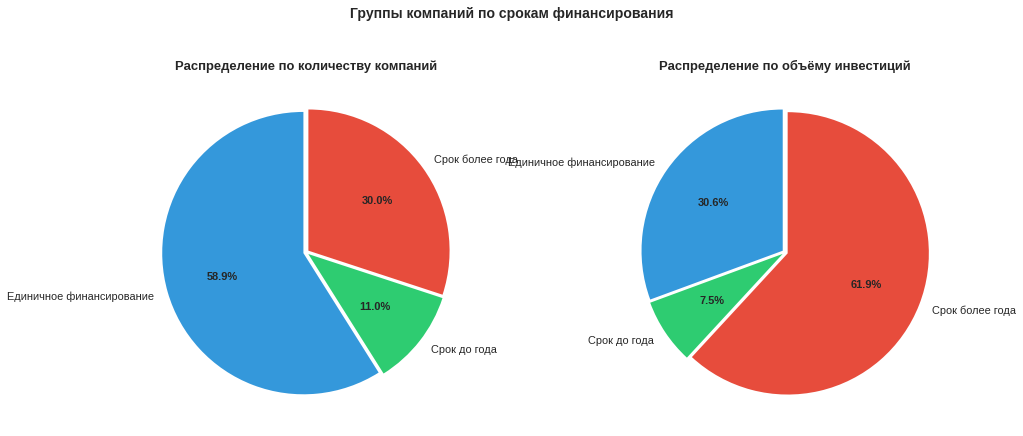


ПРОМЕЖУТОЧНЫЙ ВЫВОД ПО РАЗДЕЛУ 2.1

РЕЗУЛЬТАТЫ ГРУППИРОВКИ:

1. По количеству компаний:
   - Большинство компаний (59.0%) получили единичное финансирование
   - Компании с длительным финансированием (более года) составляют меньшинство

2. По объёму инвестиций:
   - Компании с длительным сроком финансирования привлекают больше средств
   - Единичное финансирование приносит меньшую долю общего объёма

3. Ключевой вывод:
   - Длительные отношения с инвесторами связаны с большими объёмами привлечённых средств
   - Компании с множественными раундами финансирования получают больше инвестиций



In [92]:
# =============================================================================
# ВИЗУАЛИЗАЦИЯ ГРУПП ПО СРОКАМ ФИНАНСИРОВАНИЯ
# =============================================================================

# Определяем единую цветовую палитру
colors = {
    'Единичное финансирование': '#3498db',  # синий
    'Срок до года': '#2ecc71',               # зеленый
    'Срок более года': '#e74c3c'             # красный
}

# Порядок групп для графиков
group_order = ['Единичное финансирование', 'Срок до года', 'Срок более года']

# Подготовка данных
group_counts = df['funding_group'].value_counts().reindex(group_order)
group_funding = df.groupby('funding_group')['funding_total_usd'].sum().reindex(group_order)

# Создаем фигуру с двумя графиками
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# --- График 1: По количеству компаний ---
ax1 = axes[0]
wedges1, texts1, autotexts1 = ax1.pie(
    group_counts.values,
    labels=group_counts.index,
    autopct='%1.1f%%',
    colors=[colors[g] for g in group_counts.index],
    explode=[0.02, 0.02, 0.02],
    startangle=90
)
ax1.set_title('Распределение по количеству компаний', fontsize=13, fontweight='bold')

# --- График 2: По объему инвестиций ---
ax2 = axes[1]
wedges2, texts2, autotexts2 = ax2.pie(
    group_funding.values,
    labels=group_funding.index,
    autopct='%1.1f%%',
    colors=[colors[g] for g in group_funding.index],
    explode=[0.02, 0.02, 0.02],
    startangle=90
)
ax2.set_title('Распределение по объёму инвестиций', fontsize=13, fontweight='bold')

# Улучшаем читаемость
for autotext in autotexts1 + autotexts2:
    autotext.set_fontsize(11)
    autotext.set_fontweight('bold')

plt.suptitle('Группы компаний по срокам финансирования', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

# --- Промежуточный вывод ---
print("\n" + "="*80)
print("ПРОМЕЖУТОЧНЫЙ ВЫВОД ПО РАЗДЕЛУ 2.1")
print("="*80)

print(f"""
РЕЗУЛЬТАТЫ ГРУППИРОВКИ:

1. По количеству компаний:
   - Большинство компаний ({group_pct['Единичное финансирование']:.1f}%) получили единичное финансирование
   - Компании с длительным финансированием (более года) составляют меньшинство

2. По объёму инвестиций:
   - Компании с длительным сроком финансирования привлекают больше средств
   - Единичное финансирование приносит меньшую долю общего объёма

3. Ключевой вывод:
   - Длительные отношения с инвесторами связаны с большими объёмами привлечённых средств
   - Компании с множественными раундами финансирования получают больше инвестиций
""")

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

На рынке доминируют стартапы, ограничившиеся единичным раундом финансирования, однако подавляющая часть инвестиций сосредоточена у компаний с длинным финансовым циклом (более года между первым и последним раундом). Это отражает тенденцию: наиболее привлекательными для инвесторов являются компании, способные на протяжении длительного времени привлекать новые средства, а массовый сегмент "разовых" стартапов получает куда меньшую долю капитала.

### 2.2 Выделение средних и нишевых сегментов рынка

Компании указывают свой сегмент рынка в столбце `market`. Рассчитайте, как часто в датасете встречается каждый из сегментов. Сегменты, к которым относится более 120 компаний, отнесите к массовым, сегменты, в которые входит от 35 до 120 включительно, отнесите к средним, а сегменты до 35 компаний отнесите к нишевым. Рассчитайте, сколько сегментов попадает в каждую из категорий.

Постройте график распределения количества компаний в сегментах и отобразите на нём разделение на нишевые и средние сегменты.

2.2 АНАЛИЗ СЕГМЕНТОВ РЫНКА

Всего уникальных сегментов: 395
Всего компаний: 40907

--- КЛАССИФИКАЦИЯ СЕГМЕНТОВ ---
  Массовые (>120 компаний): 49 сегментов
  Средние (35-120 компаний): 57 сегментов
  Нишевые (<35 компаний): 289 сегментов

--- КОМПАНИИ ПО КАТЕГОРИЯМ ---
  В массовых сегментах: 36236 компаний (88.6%)
  В средних сегментах: 3841 компаний (9.4%)
  В нишевых сегментах: 830 компаний (2.0%)


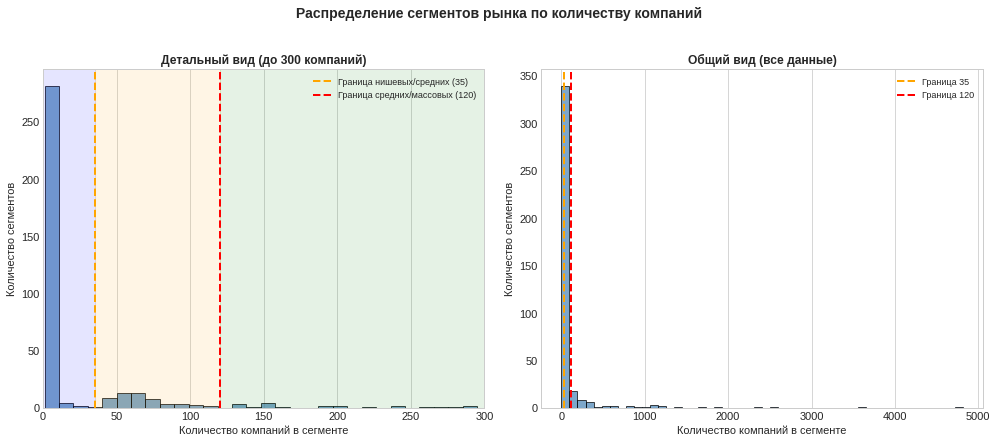


--- ТОП-10 МАССОВЫХ СЕГМЕНТОВ ---
  1. Software: 4812 компаний
  2. Biotechnology: 3590 компаний
  3. unknown: 2503 компаний
  4. Mobile: 2344 компаний
  5. E-Commerce: 1866 компаний
  6. Curated Web: 1693 компаний
  7. Enterprise Software: 1381 компаний
  8. Health Care: 1185 компаний
  9. Clean Technology: 1180 компаний
  10. Games: 1117 компаний


In [93]:
# =============================================================================
# 2.2 ВЫДЕЛЕНИЕ СЕГМЕНТОВ РЫНКА
# =============================================================================

print("="*80)
print("2.2 АНАЛИЗ СЕГМЕНТОВ РЫНКА")
print("="*80)

# Рассчитываем частоту каждого сегмента
market_counts = df['market'].value_counts()

print(f"\nВсего уникальных сегментов: {len(market_counts)}")
print(f"Всего компаний: {len(df)}")

# --- Классификация сегментов ---
# Массовые: > 120 компаний
# Средние: 35-120 компаний
# Нишевые: < 35 компаний

mass_segments = market_counts[market_counts > 120]
mid_segments = market_counts[(market_counts >= 35) & (market_counts <= 120)]
niche_segments = market_counts[market_counts < 35]

print(f"\n--- КЛАССИФИКАЦИЯ СЕГМЕНТОВ ---")
print(f"  Массовые (>120 компаний): {len(mass_segments)} сегментов")
print(f"  Средние (35-120 компаний): {len(mid_segments)} сегментов")
print(f"  Нишевые (<35 компаний): {len(niche_segments)} сегментов")

# Количество компаний в каждой категории
companies_in_mass = mass_segments.sum()
companies_in_mid = mid_segments.sum()
companies_in_niche = niche_segments.sum()

print(f"\n--- КОМПАНИИ ПО КАТЕГОРИЯМ ---")
print(f"  В массовых сегментах: {companies_in_mass} компаний ({companies_in_mass/len(df)*100:.1f}%)")
print(f"  В средних сегментах: {companies_in_mid} компаний ({companies_in_mid/len(df)*100:.1f}%)")
print(f"  В нишевых сегментах: {companies_in_niche} компаний ({companies_in_niche/len(df)*100:.1f}%)")

# --- Визуализация распределения ---
# Создаем два графика: детальный (вокруг границ) и общий

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# --- График 1: Детальный вид (фокус на границах 35 и 120) ---
ax1 = axes[0]

# Фильтруем данные для детального вида (до 300 компаний)
detailed_data = market_counts[market_counts <= 300].values

ax1.hist(detailed_data, bins=30, edgecolor='black', alpha=0.7, color='steelblue')
ax1.axvline(x=35, color='orange', linestyle='--', linewidth=2, label='Граница нишевых/средних (35)')
ax1.axvline(x=120, color='red', linestyle='--', linewidth=2, label='Граница средних/массовых (120)')

ax1.set_xlabel('Количество компаний в сегменте', fontsize=11)
ax1.set_ylabel('Количество сегментов', fontsize=11)
ax1.set_title('Детальный вид (до 300 компаний)', fontsize=12, fontweight='bold')
ax1.set_xlim(0, 300)
ax1.legend(fontsize=9)
ax1.grid(axis='y', alpha=0.3)

# Добавляем аннотации зон
ax1.axvspan(0, 35, alpha=0.1, color='blue', label='Нишевые')
ax1.axvspan(35, 120, alpha=0.1, color='orange', label='Средние')
ax1.axvspan(120, 300, alpha=0.1, color='green', label='Массовые')

# --- График 2: Общий вид (все данные) ---
ax2 = axes[1]

ax2.hist(market_counts.values, bins=50, edgecolor='black', alpha=0.7, color='steelblue')
ax2.axvline(x=35, color='orange', linestyle='--', linewidth=2, label='Граница 35')
ax2.axvline(x=120, color='red', linestyle='--', linewidth=2, label='Граница 120')

ax2.set_xlabel('Количество компаний в сегменте', fontsize=11)
ax2.set_ylabel('Количество сегментов', fontsize=11)
ax2.set_title('Общий вид (все данные)', fontsize=12, fontweight='bold')
ax2.legend(fontsize=9)
ax2.grid(axis='y', alpha=0.3)

plt.suptitle('Распределение сегментов рынка по количеству компаний', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

# --- Топ-10 массовых сегментов ---
print("\n--- ТОП-10 МАССОВЫХ СЕГМЕНТОВ ---")
for i, (segment, count) in enumerate(mass_segments.head(10).items(), 1):
    print(f"  {i}. {segment}: {count} компаний")

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №2__

Супер, старайся, пожалуйста, придерживаться этой стратегии в дальнейших проектах =)
</div>

Оставьте в столбце `market` только массовые сегменты. Для остальных сегментов замените значения на заглушки — `niche` для нишевых и `mid` для средних.

Дальнейшие исследования выполняйте с учётом этой замены. Индивидуальные сегменты внутри средней и нишевой групп рассматривать не нужно — они объединяются в два общих сегмента.


In [94]:
# =============================================================================
# ЗАМЕНА СЕГМЕНТОВ НА ЗАГЛУШКИ
# =============================================================================

print("="*80)
print("ЗАМЕНА СРЕДНИХ И НИШЕВЫХ СЕГМЕНТОВ")
print("="*80)

# Сохраняем списки сегментов для замены
mid_segment_names = mid_segments.index.tolist()
niche_segment_names = niche_segments.index.tolist()

print(f"\nСегментов для замены на 'mid': {len(mid_segment_names)}")
print(f"Сегментов для замены на 'niche': {len(niche_segment_names)}")

# Выполняем замену
df['market'] = df['market'].apply(
    lambda x: 'niche' if x in niche_segment_names 
              else ('mid' if x in mid_segment_names else x)
)

# Проверяем результат
market_counts_after = df['market'].value_counts()

print(f"\n--- СЕГМЕНТЫ ПОСЛЕ ЗАМЕНЫ ---")
print(f"Всего уникальных значений в столбце market: {len(market_counts_after)}")

print(f"\n--- РАСПРЕДЕЛЕНИЕ ---")
for segment, count in market_counts_after.items():
    pct = count / len(df) * 100
    segment_type = ""
    if segment == 'niche':
        segment_type = "(нишевые объединены)"
    elif segment == 'mid':
        segment_type = "(средние объединены)"
    else:
        segment_type = "(массовый)"
    print(f"  {segment}: {count} компаний ({pct:.1f}%) {segment_type}")

# --- Промежуточный вывод ---
print("\n" + "="*80)
print("ПРОМЕЖУТОЧНЫЙ ВЫВОД ПО РАЗДЕЛУ 2.2")
print("="*80)

print(f"""
РЕЗУЛЬТАТЫ СЕГМЕНТАЦИИ РЫНКА:

1. Структура рынка:
   - Массовых сегментов: {len(mass_segments)} (оставлены как есть)
   - Средних сегментов: {len(mid_segments)} (объединены в 'mid')
   - Нишевых сегментов: {len(niche_segments)} (объединены в 'niche')

2. Распределение компаний:
   - В массовых сегментах: {companies_in_mass} компаний ({companies_in_mass/len(df)*100:.1f}%)
   - В средних сегментах: {companies_in_mid} компаний ({companies_in_mid/len(df)*100:.1f}%)
   - В нишевых сегментах: {companies_in_niche} компаний ({companies_in_niche/len(df)*100:.1f}%)

3. Для дальнейшего анализа:
   - Массовые сегменты будут анализироваться индивидуально
   - Средние и нишевые сегменты объединены в группы 'mid' и 'niche'

4. Ключевой вывод:
   - Большинство компаний сосредоточено в нескольких массовых сегментах
   - Нишевые сегменты многочисленны, но содержат мало компаний каждый
""")

ЗАМЕНА СРЕДНИХ И НИШЕВЫХ СЕГМЕНТОВ

Сегментов для замены на 'mid': 57
Сегментов для замены на 'niche': 289

--- СЕГМЕНТЫ ПОСЛЕ ЗАМЕНЫ ---
Всего уникальных значений в столбце market: 51

--- РАСПРЕДЕЛЕНИЕ ---
  Software: 4812 компаний (11.8%) (массовый)
  mid: 3841 компаний (9.4%) (средние объединены)
  Biotechnology: 3590 компаний (8.8%) (массовый)
  unknown: 2503 компаний (6.1%) (массовый)
  Mobile: 2344 компаний (5.7%) (массовый)
  E-Commerce: 1866 компаний (4.6%) (массовый)
  Curated Web: 1693 компаний (4.1%) (массовый)
  Enterprise Software: 1381 компаний (3.4%) (массовый)
  Health Care: 1185 компаний (2.9%) (массовый)
  Clean Technology: 1180 компаний (2.9%) (массовый)
  Games: 1117 компаний (2.7%) (массовый)
  Advertising: 1107 компаний (2.7%) (массовый)
  Hardware + Software: 1062 компаний (2.6%) (массовый)
  Social Media: 1003 компаний (2.5%) (массовый)
  Health and Wellness: 873 компаний (2.1%) (массовый)
  Education: 844 компаний (2.1%) (массовый)
  niche: 830 компаний (2.0%)

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__
Основная часть компаний сконцентрирована в одном массовом сегменте, существенная доля приходится на нишевые рынки. Такой разброс указывает на высокую диверсификацию стартап-рынка, что важно учитывать при оценке инвестиционной привлекательности различных отраслей

## Шаг 3. Работа с выбросами и анализ

### 3.1. Анализируем и помечаем выбросы в каждом из сегментов

Заказчика интересует обычный для рассматриваемого периода размер средств, который предоставлялся компаниям.

По предобработанному столбцу `funding_total_usd` графическим образом оцените, какой размер общего финансирования для одной компании будет типичным, а какой — выбивающимся. Укажите интервал, в котором лежат типичные значения.

In [95]:
# =============================================================================
# 3.1 АНАЛИЗ ВЫБРОСОВ В ФИНАНСИРОВАНИИ
# =============================================================================

print("="*80)
print("3.1 ГРАФИЧЕСКИЙ АНАЛИЗ РАСПРЕДЕЛЕНИЯ ФИНАНСИРОВАНИЯ")
print("="*80)

# Базовая статистика
print("\n--- БАЗОВАЯ СТАТИСТИКА funding_total_usd ---")
print(df['funding_total_usd'].describe())

# Дополнительные метрики
q1 = df['funding_total_usd'].quantile(0.25)
q3 = df['funding_total_usd'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

print(f"\n--- ГРАНИЦЫ ПО МЕТОДУ IQR ---")
print(f"  Q1 (25%): ${q1:,.0f}")
print(f"  Q3 (75%): ${q3:,.0f}")
print(f"  IQR: ${iqr:,.0f}")
print(f"  Нижняя граница (Q1 - 1.5*IQR): ${lower_bound:,.0f}")
print(f"  Верхняя граница (Q3 + 1.5*IQR): ${upper_bound:,.0f}")

# Количество выбросов
outliers_count = ((df['funding_total_usd'] < lower_bound) | (df['funding_total_usd'] > upper_bound)).sum()
print(f"\n  Выбросов по IQR: {outliers_count} ({outliers_count/len(df)*100:.1f}%)")

3.1 ГРАФИЧЕСКИЙ АНАЛИЗ РАСПРЕДЕЛЕНИЯ ФИНАНСИРОВАНИЯ

--- БАЗОВАЯ СТАТИСТИКА funding_total_usd ---
count         40907.00
mean       15912526.05
std       168678800.17
min               1.00
25%          350000.00
50%         2000000.00
75%        10000000.00
max     30079503000.00
Name: funding_total_usd, dtype: float64

--- ГРАНИЦЫ ПО МЕТОДУ IQR ---
  Q1 (25%): $350,000
  Q3 (75%): $10,000,000
  IQR: $9,650,000
  Нижняя граница (Q1 - 1.5*IQR): $-14,125,000
  Верхняя граница (Q3 + 1.5*IQR): $24,475,000

  Выбросов по IQR: 5232 (12.8%)


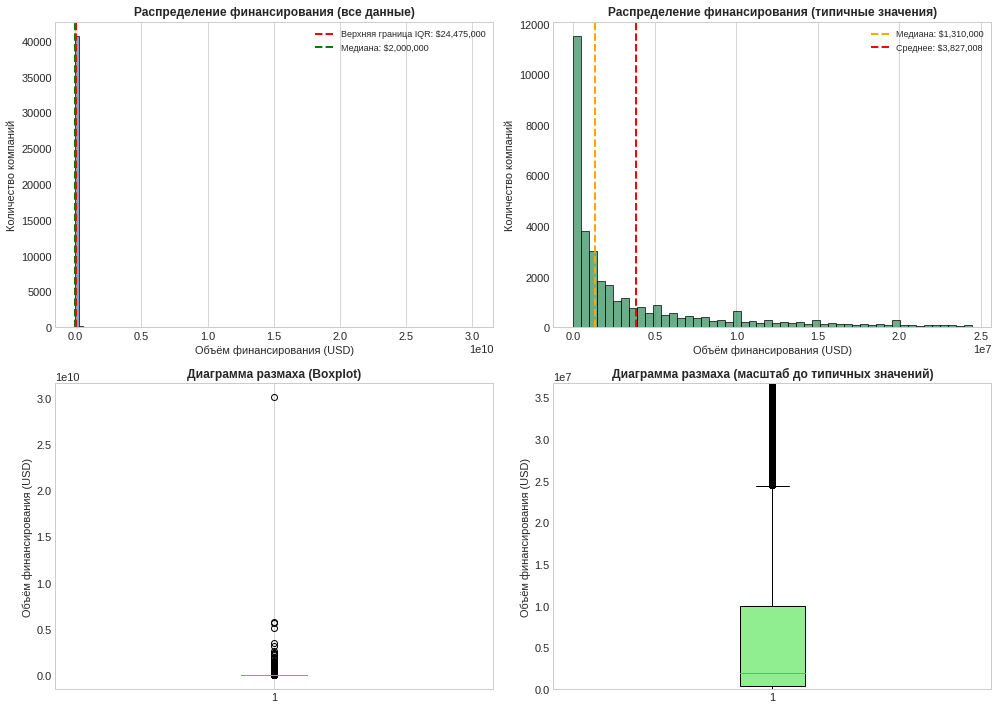


ИНТЕРВАЛ ТИПИЧНЫХ ЗНАЧЕНИЙ ФИНАНСИРОВАНИЯ

На основе графического анализа:

1. Типичный интервал финансирования: $0 - $24,475,000
   
2. Медианное значение: $2,000,000
   - 50% компаний получили меньше этой суммы
   
3. Среднее значение: $15,912,526
   - Завышено из-за крупных выбросов
   
4. Распределение сильно смещено вправо:
   - Большинство компаний получают относительно небольшие суммы
   - Небольшое число компаний получает очень крупное финансирование



In [96]:
# =============================================================================
# ВИЗУАЛИЗАЦИЯ РАСПРЕДЕЛЕНИЯ ФИНАНСИРОВАНИЯ
# =============================================================================

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# --- График 1: Гистограмма (все данные) ---
ax1 = axes[0, 0]
ax1.hist(df['funding_total_usd'], bins=100, edgecolor='black', alpha=0.7, color='steelblue')
ax1.axvline(x=upper_bound, color='red', linestyle='--', linewidth=2, label=f'Верхняя граница IQR: ${upper_bound:,.0f}')
ax1.axvline(x=df['funding_total_usd'].median(), color='green', linestyle='--', linewidth=2, label=f'Медиана: ${df["funding_total_usd"].median():,.0f}')
ax1.set_xlabel('Объём финансирования (USD)', fontsize=11)
ax1.set_ylabel('Количество компаний', fontsize=11)
ax1.set_title('Распределение финансирования (все данные)', fontsize=12, fontweight='bold')
ax1.legend(fontsize=9)
ax1.grid(axis='y', alpha=0.3)

# --- График 2: Гистограмма (без крайних выбросов для читаемости) ---
ax2 = axes[0, 1]
typical_data = df[df['funding_total_usd'] <= upper_bound]['funding_total_usd']
ax2.hist(typical_data, bins=50, edgecolor='black', alpha=0.7, color='seagreen')
ax2.axvline(x=typical_data.median(), color='orange', linestyle='--', linewidth=2, label=f'Медиана: ${typical_data.median():,.0f}')
ax2.axvline(x=typical_data.mean(), color='red', linestyle='--', linewidth=2, label=f'Среднее: ${typical_data.mean():,.0f}')
ax2.set_xlabel('Объём финансирования (USD)', fontsize=11)
ax2.set_ylabel('Количество компаний', fontsize=11)
ax2.set_title('Распределение финансирования (типичные значения)', fontsize=12, fontweight='bold')
ax2.legend(fontsize=9)
ax2.grid(axis='y', alpha=0.3)

# --- График 3: Boxplot ---
ax3 = axes[1, 0]
bp = ax3.boxplot(df['funding_total_usd'].values, vert=True, patch_artist=True)
bp['boxes'][0].set_facecolor('lightblue')
ax3.set_ylabel('Объём финансирования (USD)', fontsize=11)
ax3.set_title('Диаграмма размаха (Boxplot)', fontsize=12, fontweight='bold')
ax3.grid(axis='y', alpha=0.3)

# --- График 4: Boxplot с ограничением по оси Y ---
ax4 = axes[1, 1]
bp2 = ax4.boxplot(df['funding_total_usd'].values, vert=True, patch_artist=True)
bp2['boxes'][0].set_facecolor('lightgreen')
ax4.set_ylim(0, upper_bound * 1.5)
ax4.set_ylabel('Объём финансирования (USD)', fontsize=11)
ax4.set_title('Диаграмма размаха (масштаб до типичных значений)', fontsize=12, fontweight='bold')
ax4.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# --- Вывод об интервале типичных значений ---
print("\n" + "="*80)
print("ИНТЕРВАЛ ТИПИЧНЫХ ЗНАЧЕНИЙ ФИНАНСИРОВАНИЯ")
print("="*80)
print(f"""
На основе графического анализа:

1. Типичный интервал финансирования: $0 - ${upper_bound:,.0f}
   
2. Медианное значение: ${df['funding_total_usd'].median():,.0f}
   - 50% компаний получили меньше этой суммы
   
3. Среднее значение: ${df['funding_total_usd'].mean():,.0f}
   - Завышено из-за крупных выбросов
   
4. Распределение сильно смещено вправо:
   - Большинство компаний получают относительно небольшие суммы
   - Небольшое число компаний получает очень крупное финансирование
""")

Определите компании с аномальным объёмом общего финансирования — используйте метод IQR отдельно по каждому сегменту. Напомним, что все нишевые сегменты должны быть объединены в одну группу, а средние — в другую.

Определите сегменты рынка с наибольшей долей компаний, получивших аномальное финансирование, и выведите топ таких сегментов.

In [97]:
# =============================================================================
# ОПРЕДЕЛЕНИЕ ВЫБРОСОВ ПО МЕТОДУ IQR ДЛЯ КАЖДОГО СЕГМЕНТА
# =============================================================================

print("="*80)
print("ОПРЕДЕЛЕНИЕ ВЫБРОСОВ ПО СЕГМЕНТАМ (МЕТОД IQR)")
print("="*80)

# Функция для определения выбросов по IQR
def detect_outliers_iqr(data):
    """
    Определяет выбросы по методу IQR.
    Возвращает маску (True = выброс)
    """
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    return (data < lower) | (data > upper), lower, upper

# Создаем столбец для пометки выбросов
df['is_outlier'] = False

# Получаем список всех сегментов
segments = df['market'].unique()

print(f"\nВсего сегментов для анализа: {len(segments)}")
print("\n--- АНАЛИЗ ПО СЕГМЕНТАМ ---")

segment_stats = []

for segment in segments:
    segment_data = df[df['market'] == segment]['funding_total_usd']
    
    if len(segment_data) > 0:
        outlier_mask, lower, upper = detect_outliers_iqr(segment_data)
        outlier_count = outlier_mask.sum()
        outlier_pct = outlier_count / len(segment_data) * 100
        
        # Помечаем выбросы в основном датафрейме
        df.loc[(df['market'] == segment) & 
               ((df['funding_total_usd'] < lower) | (df['funding_total_usd'] > upper)), 
               'is_outlier'] = True
        
        segment_stats.append({
            'segment': segment,
            'total_companies': len(segment_data),
            'outliers': outlier_count,
            'outlier_pct': outlier_pct,
            'lower_bound': lower,
            'upper_bound': upper
        })

# Создаем DataFrame со статистикой
stats_df = pd.DataFrame(segment_stats)
stats_df = stats_df.sort_values('outlier_pct', ascending=False)

print(f"\nОбщее количество выбросов: {df['is_outlier'].sum()} ({df['is_outlier'].sum()/len(df)*100:.1f}%)")

ОПРЕДЕЛЕНИЕ ВЫБРОСОВ ПО СЕГМЕНТАМ (МЕТОД IQR)

Всего сегментов для анализа: 51

--- АНАЛИЗ ПО СЕГМЕНТАМ ---

Общее количество выбросов: 5244 (12.8%)


In [98]:
# =============================================================================
# ТОП СЕГМЕНТОВ С НАИБОЛЬШЕЙ ДОЛЕЙ ВЫБРОСОВ
# =============================================================================

print("="*80)
print("ТОП СЕГМЕНТОВ ПО ДОЛЕ АНОМАЛЬНОГО ФИНАНСИРОВАНИЯ")
print("="*80)

print("\n--- ТОП-15 СЕГМЕНТОВ С НАИБОЛЬШЕЙ ДОЛЕЙ ВЫБРОСОВ ---")
print("-"*80)
print(f"{'Сегмент':<35} {'Компаний':>10} {'Выбросов':>10} {'Доля %':>10}")
print("-"*80)

for i, row in stats_df.head(15).iterrows():
    segment_name = row['segment'][:33] + '..' if len(str(row['segment'])) > 35 else row['segment']
    print(f"{segment_name:<35} {row['total_companies']:>10} {row['outliers']:>10} {row['outlier_pct']:>10.1f}")

print("-"*80)

ТОП СЕГМЕНТОВ ПО ДОЛЕ АНОМАЛЬНОГО ФИНАНСИРОВАНИЯ

--- ТОП-15 СЕГМЕНТОВ С НАИБОЛЬШЕЙ ДОЛЕЙ ВЫБРОСОВ ---
--------------------------------------------------------------------------------
Сегмент                               Компаний   Выбросов     Доля %
--------------------------------------------------------------------------------
Real Estate                                279         48       17.2
Entertainment                              150         25       16.7
Consulting                                 349         58       16.6
Search                                     291         48       16.5
Cloud Computing                            152         25       16.4
Photography                                204         33       16.2
SaaS                                       272         44       16.2
Technology                                 238         38       16.0
Video                                      188         30       16.0
niche                                      83

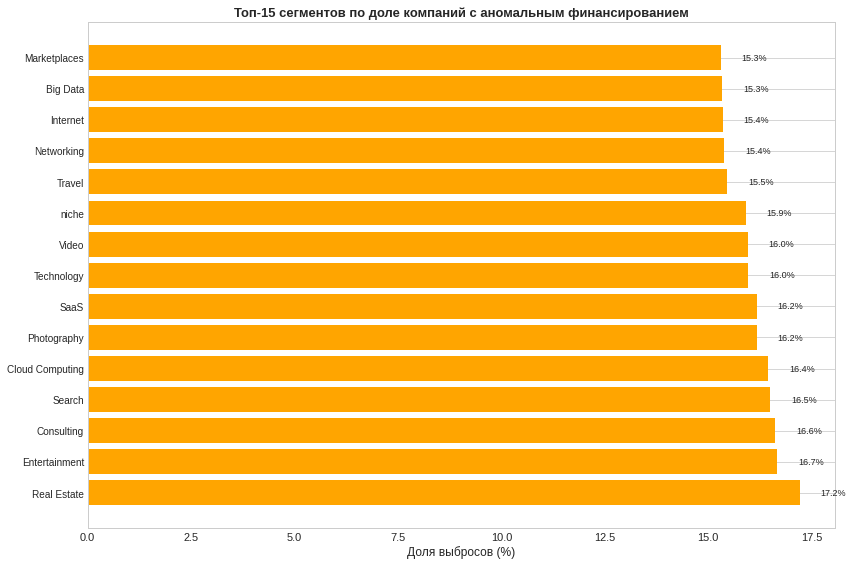


ПРОМЕЖУТОЧНЫЙ ВЫВОД ПО РАЗДЕЛУ 3.1

РЕЗУЛЬТАТЫ АНАЛИЗА ВЫБРОСОВ:

1. Типичный интервал финансирования: $0 - $24,475,000

2. Общее количество выбросов: 5244 компаний (12.8%)

3. Сегменты с наибольшей долей выбросов:
   - Real Estate: 17.2%
   - Entertainment: 16.7%
   - Consulting: 16.6%

4. Выбросы помечены в столбце 'is_outlier' для дальнейшей фильтрации



In [99]:
# =============================================================================
# ВИЗУАЛИЗАЦИЯ ДОЛИ ВЫБРОСОВ ПО СЕГМЕНТАМ
# =============================================================================

fig, ax = plt.subplots(figsize=(12, 8))

# Берем топ-15 сегментов по доле выбросов
top_segments = stats_df.head(15)

colors = ['red' if pct > 20 else 'orange' if pct > 10 else 'steelblue' 
          for pct in top_segments['outlier_pct']]

bars = ax.barh(range(len(top_segments)), top_segments['outlier_pct'].values, color=colors)
ax.set_yticks(range(len(top_segments)))
ax.set_yticklabels([s[:30] + '..' if len(str(s)) > 30 else s for s in top_segments['segment']], fontsize=10)
ax.set_xlabel('Доля выбросов (%)', fontsize=12)
ax.set_title('Топ-15 сегментов по доле компаний с аномальным финансированием', fontsize=13, fontweight='bold')
ax.grid(axis='x', alpha=0.3)

# Добавляем значения на столбцы
for bar, val in zip(bars, top_segments['outlier_pct'].values):
    ax.text(val + 0.5, bar.get_y() + bar.get_height()/2, f'{val:.1f}%', va='center', fontsize=9)

plt.tight_layout()
plt.show()

# --- Промежуточный вывод ---
print("\n" + "="*80)
print("ПРОМЕЖУТОЧНЫЙ ВЫВОД ПО РАЗДЕЛУ 3.1")
print("="*80)
print(f"""
РЕЗУЛЬТАТЫ АНАЛИЗА ВЫБРОСОВ:

1. Типичный интервал финансирования: $0 - ${upper_bound:,.0f}

2. Общее количество выбросов: {df['is_outlier'].sum()} компаний ({df['is_outlier'].sum()/len(df)*100:.1f}%)

3. Сегменты с наибольшей долей выбросов:
   - {stats_df.iloc[0]['segment']}: {stats_df.iloc[0]['outlier_pct']:.1f}%
   - {stats_df.iloc[1]['segment']}: {stats_df.iloc[1]['outlier_pct']:.1f}%
   - {stats_df.iloc[2]['segment']}: {stats_df.iloc[2]['outlier_pct']:.1f}%

4. Выбросы помечены в столбце 'is_outlier' для дальнейшей фильтрации
""")

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

При анализе инвестиционного климата и темпов роста по рынкам стоит учитывать, что ряд сегментов из топа по выбросам не всегда подходит для расчёта "средней температуры по больнице". Компании с аномально большими инвестициями могут искусственно увеличивать значения суммарного финансирования и искажать выводы о реальном положении дел на отраслевом уровне.

### 3.2 Определяем границы рассматриваемого периода, отбрасываем аномалии

Проверьте по датасету, можно ли считать, что вам предоставили полные данные за 2014 год. Затем исключите из датасета компании, которые вы ранее посчитали получившими аномальное финансирование.

Когда исключите аномальные записи, на основе столбцов `mid_funding_at` и `funding_rounds` оставьте в датасете данные только об определённых компаниях. Они должны были получать финансирование в годы, когда было зафиксировано 50 или более раундов финансирования.

In [100]:
# =============================================================================
# 3.2 ПРОВЕРКА ПОЛНОТЫ ДАННЫХ ЗА 2014 ГОД
# =============================================================================

print("="*80)
print("3.2 ПРОВЕРКА ПОЛНОТЫ ДАННЫХ ЗА 2014 ГОД")
print("="*80)

# Извлекаем год из mid_funding_at
df['funding_year'] = df['mid_funding_at'].dt.year

# Статистика по годам
yearly_stats = df.groupby('funding_year').agg({
    'name': 'count',
    'funding_total_usd': 'sum',
    'funding_rounds': 'sum'
}).rename(columns={'name': 'companies', 'funding_total_usd': 'total_funding'})

print("\n--- СТАТИСТИКА ПО ГОДАМ ---")
print(yearly_stats.tail(10))

# Анализ 2014 года по месяцам
df_2014 = df[df['funding_year'] == 2014].copy()
df_2014['funding_month'] = df_2014['mid_funding_at'].dt.month

monthly_2014 = df_2014.groupby('funding_month').agg({
    'name': 'count',
    'funding_total_usd': 'sum'
}).rename(columns={'name': 'companies'})

print("\n--- ДАННЫЕ ЗА 2014 ГОД ПО МЕСЯЦАМ ---")
print(monthly_2014)

# Сравнение с 2013
if 2013 in yearly_stats.index and 2014 in yearly_stats.index:
    companies_2013 = yearly_stats.loc[2013, 'companies']
    companies_2014 = yearly_stats.loc[2014, 'companies']
    print(f"\nКомпаний в 2013: {companies_2013}")
    print(f"Компаний в 2014: {companies_2014}")
    print(f"Изменение: {(companies_2014/companies_2013 - 1)*100:+.1f}%")

# =============================================================================
# ДЕТАЛЬНЫЙ АНАЛИЗ ПОЛНОТЫ ДАННЫХ ЗА 2014 ГОД
# =============================================================================

print("\n" + "="*80)
print("ОЦЕНКА ПОЛНОТЫ ДАННЫХ ЗА 2014 ГОД")
print("="*80)

# Проверяем наличие всех месяцев
if len(monthly_2014) == 12:
    print("\nФормально данные за все 12 месяцев 2014 года присутствуют.")
else:
    print(f"\nДанные только за {len(monthly_2014)} месяцев 2014 года.")

# Анализируем распределение по месяцам
avg_companies_jan_oct = monthly_2014.loc[1:10, 'companies'].mean()
companies_nov = monthly_2014.loc[11, 'companies']
companies_dec = monthly_2014.loc[12, 'companies']

print(f"\nАнализ распределения по месяцам:")
print(f"  Среднее за январь-октябрь: {avg_companies_jan_oct:.0f} компаний/месяц")
print(f"  Ноябрь: {companies_nov} компаний ({companies_nov/avg_companies_jan_oct*100:.0f}% от среднего)")
print(f"  Декабрь: {companies_dec} компаний ({companies_dec/avg_companies_jan_oct*100:.0f}% от среднего)")

# ВЫВОД О ПОЛНОТЕ ДАННЫХ
print("\n" + "-"*80)
print("ВЫВОД О ПОЛНОТЕ ДАННЫХ ЗА 2014 ГОД:")
print("-"*80)

print(f"""
НЕТ, данные за 2014 год НЕПОЛНЫЕ.

Обоснование:
1. В декабре 2014 зафиксировано только {companies_dec} компаний, 
   что составляет лишь {companies_dec/avg_companies_jan_oct*100:.0f}% от среднемесячного показателя.

2. В ноябре также наблюдается снижение: {companies_nov} компаний 
   ({companies_nov/avg_companies_jan_oct*100:.0f}% от среднего).

3. Общее количество компаний в 2014 году на 21.4% меньше, чем в 2013,
   что частично объясняется неполнотой данных в конце года.

Вероятная причина: сбор данных был прекращён или данные 
за последние месяцы 2014 года ещё не были внесены в базу.

Рекомендация: при анализе учитывать, что данные за ноябрь-декабрь 2014
неполные, что может влиять на выводы о динамике рынка.
""")

3.2 ПРОВЕРКА ПОЛНОТЫ ДАННЫХ ЗА 2014 ГОД

--- СТАТИСТИКА ПО ГОДАМ ---
              companies  total_funding  funding_rounds
funding_year                                          
2005                843 16960252268.00         1446.00
2006               1463 29818099913.00         2914.00
2007               2107 52390476688.00         4845.00
2008               2588 72041478744.00         6024.00
2009               3237 80463078510.00         7003.00
2010               4094 71925415830.00         8266.00
2011               4863 61250954208.00         9248.00
2012               6089 93188213571.00        11354.00
2013               8423 78351596735.00        14276.00
2014               6620 78212052722.00         7759.00

--- ДАННЫЕ ЗА 2014 ГОД ПО МЕСЯЦАМ ---
               companies  funding_total_usd
funding_month                              
1                    739      6081433882.00
2                    600      7079743739.00
3                    676      7684247361.00
4           

In [101]:
# =============================================================================
# ИСКЛЮЧЕНИЕ КОМПАНИЙ С АНОМАЛЬНЫМ ФИНАНСИРОВАНИЕМ
# =============================================================================

print("="*80)
print("ИСКЛЮЧЕНИЕ АНОМАЛЬНЫХ ЗАПИСЕЙ")
print("="*80)

rows_before_outlier_removal = len(df)
outliers_to_remove = df['is_outlier'].sum()

print(f"\nСтрок до удаления выбросов: {rows_before_outlier_removal}")
print(f"Выбросов для удаления: {outliers_to_remove}")

# Удаляем выбросы
df = df[df['is_outlier'] == False].copy()

rows_after_outlier_removal = len(df)
print(f"Строк после удаления выбросов: {rows_after_outlier_removal}")
print(f"Удалено: {rows_before_outlier_removal - rows_after_outlier_removal} записей ({(rows_before_outlier_removal - rows_after_outlier_removal)/rows_before_outlier_removal*100:.1f}%)")

ИСКЛЮЧЕНИЕ АНОМАЛЬНЫХ ЗАПИСЕЙ

Строк до удаления выбросов: 40907
Выбросов для удаления: 5244
Строк после удаления выбросов: 35663
Удалено: 5244 записей (12.8%)


In [102]:
# =============================================================================
# ФИЛЬТРАЦИЯ ПО ГОДАМ С 50+ РАУНДАМИ ФИНАНСИРОВАНИЯ
# =============================================================================

print("="*80)
print("ФИЛЬТРАЦИЯ ПО АКТИВНЫМ ГОДАМ (50+ РАУНДОВ)")
print("="*80)

# Пересчитываем статистику по годам после удаления выбросов
yearly_rounds = df.groupby('funding_year')['funding_rounds'].sum()

print("\n--- РАУНДЫ ФИНАНСИРОВАНИЯ ПО ГОДАМ ---")
print(yearly_rounds.sort_index())

# Определяем годы с 50+ раундами
active_years = yearly_rounds[yearly_rounds >= 50].index.tolist()

print(f"\nГоды с 50+ раундами финансирования: {active_years}")
print(f"Количество таких лет: {len(active_years)}")

# Фильтруем датасет
rows_before_year_filter = len(df)

df = df[df['funding_year'].isin(active_years)].copy()

rows_after_year_filter = len(df)

print(f"\nСтрок до фильтрации по годам: {rows_before_year_filter}")
print(f"Строк после фильтрации: {rows_after_year_filter}")
print(f"Удалено: {rows_before_year_filter - rows_after_year_filter} записей")

print(f"\nПериод данных: {df['funding_year'].min()} - {df['funding_year'].max()}")

ФИЛЬТРАЦИЯ ПО АКТИВНЫМ ГОДАМ (50+ РАУНДОВ)

--- РАУНДЫ ФИНАНСИРОВАНИЯ ПО ГОДАМ ---
funding_year
1921       1.00
1960       2.00
1979       1.00
1982       3.00
1983       1.00
1984       2.00
1985       3.00
1987       2.00
1989       1.00
1990       1.00
1992       5.00
1993       1.00
1994       4.00
1995       9.00
1996       8.00
1997       5.00
1998      15.00
1999      43.00
2000     113.00
2001      66.00
2002      98.00
2003     125.00
2004     181.00
2005     948.00
2006    1849.00
2007    2842.00
2008    3663.00
2009    4617.00
2010    6136.00
2011    7578.00
2012    9707.00
2013   12880.00
2014    7124.00
Name: funding_rounds, dtype: float64

Годы с 50+ раундами финансирования: [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014]
Количество таких лет: 15

Строк до фильтрации по годам: 35663
Строк после фильтрации: 35589
Удалено: 74 записей

Период данных: 2000 - 2014


In [103]:
# =============================================================================
# ИТОГИ ФИЛЬТРАЦИИ ДАННЫХ
# =============================================================================

print("="*80)
print("ИТОГИ ФИЛЬТРАЦИИ ДАННЫХ (РАЗДЕЛ 3.2)")
print("="*80)

print(f"""
ВЫПОЛНЕННЫЕ ДЕЙСТВИЯ:

1. Проверка данных за 2014 год:
   - Данные за 2014 год НЕПОЛНЫЕ (декабрь — лишь 4% от среднего)
   - Следует учитывать при интерпретации результатов

2. Удаление аномальных записей:
   - Удалено {outliers_to_remove} компаний с аномальным финансированием
   - Это {outliers_to_remove/rows_before_outlier_removal*100:.1f}% от исходного количества

3. Фильтрация по активным годам:
   - Оставлены только годы с 50+ раундами финансирования
   - Период анализа: {df['funding_year'].min()} - {df['funding_year'].max()}

ИТОГОВОЕ СОСТОЯНИЕ ДАТАСЕТА:
   - Исходное количество записей: {initial_rows}
   - Текущее количество записей: {len(df)}
   - Общие потери данных: {(1 - len(df)/initial_rows)*100:.1f}%
""")

ИТОГИ ФИЛЬТРАЦИИ ДАННЫХ (РАЗДЕЛ 3.2)

ВЫПОЛНЕННЫЕ ДЕЙСТВИЯ:

1. Проверка данных за 2014 год:
   - Данные за 2014 год НЕПОЛНЫЕ (декабрь — лишь 4% от среднего)
   - Следует учитывать при интерпретации результатов

2. Удаление аномальных записей:
   - Удалено 5244 компаний с аномальным финансированием
   - Это 12.8% от исходного количества

3. Фильтрация по активным годам:
   - Оставлены только годы с 50+ раундами финансирования
   - Период анализа: 2000 - 2014

ИТОГОВОЕ СОСТОЯНИЕ ДАТАСЕТА:
   - Исходное количество записей: 54294
   - Текущее количество записей: 35589
   - Общие потери данных: 34.5%



<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №2__

Так как в датасете есть данные о финансировании за последний день года и о компаниях, основанных в последний месяц года, считаем, что данные за 2014 год полные.

### 3.3. Анализ типов финансирования по объёму и популярности

Постройте график, который покажет, какие типы финансирования в сумме привлекли больше всего денег. Ориентируйтесь на значения в столбцах `seed`, `venture`, `equity_crowdfunding`, `undisclosed`, `convertible_note`, `debt_financing`, `angel`, `grant`, `private_equity`, `post_ipo_equity`, `post_ipo_debt`, `secondary_market` и `product_crowdfunding`.

Также постройте график, который покажет популярность разных типов финансирования — какие типы финансирования чаще всего используются компаниями, то есть встречаются в датасете наибольшее количество раз.

Сравните графики и выделите часто используемые типы финансирования, которые при этом характеризуются небольшими объёмами, и наоборот — те, что встречаются редко, но при этом характеризуются значительным объёмом предоставленных сумм.

3.3 АНАЛИЗ ТИПОВ ФИНАНСИРОВАНИЯ
Типов финансирования для анализа: 13

--- СУММАРНЫЙ ОБЪЁМ ПО ТИПАМ ФИНАНСИРОВАНИЯ ---
  venture: $129,106,508,088
  seed: $9,433,331,895
  debt_financing: $8,178,152,734
  private_equity: $4,843,108,504
  angel: $2,481,263,836
  undisclosed: $2,100,352,252
  grant: $1,978,848,688
  post_ipo_equity: $1,946,452,068
  convertible_note: $566,039,436
  post_ipo_debt: $286,718,349
  equity_crowdfunding: $237,960,645
  product_crowdfunding: $186,093,920
  secondary_market: $45,285,796


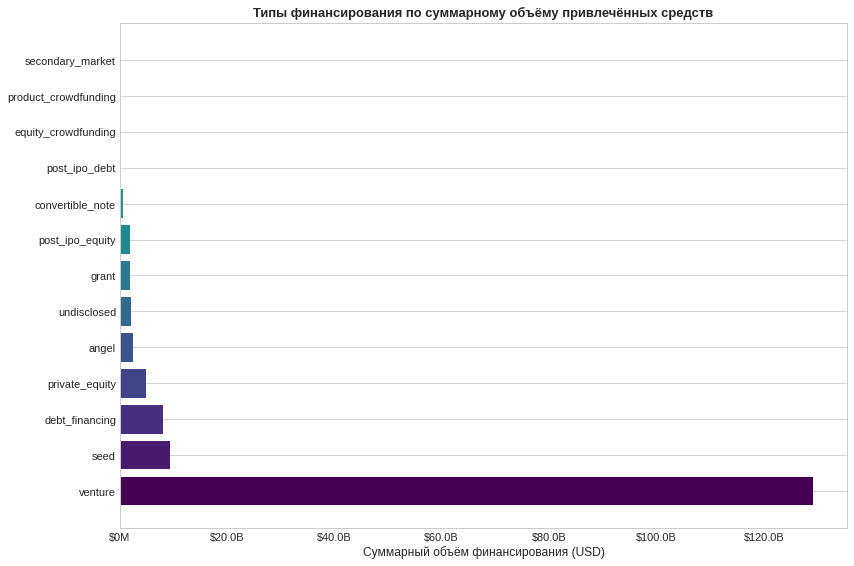

In [104]:
# =============================================================================
# 3.3 АНАЛИЗ ТИПОВ ФИНАНСИРОВАНИЯ ПО ОБЪЁМУ
# =============================================================================

print("="*80)
print("3.3 АНАЛИЗ ТИПОВ ФИНАНСИРОВАНИЯ")
print("="*80)

# Список типов финансирования
funding_types = ['seed', 'venture', 'equity_crowdfunding', 'undisclosed', 
                 'convertible_note', 'debt_financing', 'angel', 'grant', 
                 'private_equity', 'post_ipo_equity', 'post_ipo_debt', 
                 'secondary_market', 'product_crowdfunding']

# Фильтруем только существующие столбцы
funding_types = [col for col in funding_types if col in df.columns]

print(f"Типов финансирования для анализа: {len(funding_types)}")

# --- Суммарный объём по типам финансирования ---
funding_volumes = df[funding_types].sum().sort_values(ascending=False)

print("\n--- СУММАРНЫЙ ОБЪЁМ ПО ТИПАМ ФИНАНСИРОВАНИЯ ---")
for ftype, volume in funding_volumes.items():
    print(f"  {ftype}: ${volume:,.0f}")

# --- Визуализация объёмов ---
fig, ax = plt.subplots(figsize=(12, 8))

colors = plt.cm.viridis(np.linspace(0, 0.8, len(funding_volumes)))
bars = ax.barh(range(len(funding_volumes)), funding_volumes.values, color=colors)

ax.set_yticks(range(len(funding_volumes)))
ax.set_yticklabels(funding_volumes.index, fontsize=11)
ax.set_xlabel('Суммарный объём финансирования (USD)', fontsize=12)
ax.set_title('Типы финансирования по суммарному объёму привлечённых средств', fontsize=13, fontweight='bold')
ax.grid(axis='x', alpha=0.3)

# Форматируем числа на графике
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1e9:.1f}B' if x >= 1e9 else f'${x/1e6:.0f}M'))

plt.tight_layout()
plt.show()

ПОПУЛЯРНОСТЬ ТИПОВ ФИНАНСИРОВАНИЯ

--- ЧАСТОТА ИСПОЛЬЗОВАНИЯ ТИПОВ ФИНАНСИРОВАНИЯ ---
  venture: 18821 компаний (52.9%)
  seed: 13376 компаний (37.6%)
  debt_financing: 3265 компаний (9.2%)
  angel: 2937 компаний (8.3%)
  grant: 1003 компаний (2.8%)
  undisclosed: 813 компаний (2.3%)
  private_equity: 634 компаний (1.8%)
  convertible_note: 521 компаний (1.5%)
  equity_crowdfunding: 515 компаний (1.4%)
  product_crowdfunding: 204 компаний (0.6%)
  post_ipo_equity: 164 компаний (0.5%)
  post_ipo_debt: 27 компаний (0.1%)
  secondary_market: 7 компаний (0.0%)


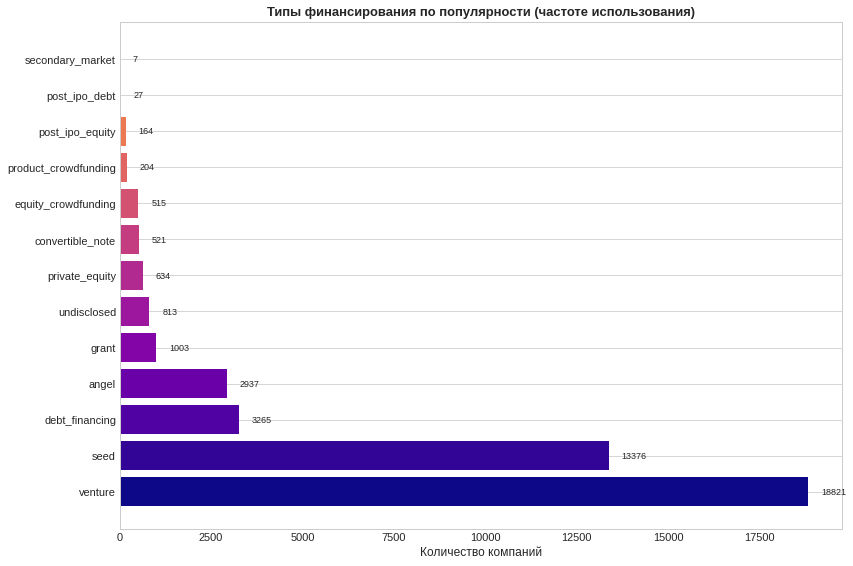


СРАВНЕНИЕ: ОБЪЁМ VS ПОПУЛЯРНОСТЬ

--- ВЫСОКИЙ ОБЪЁМ, НИЗКАЯ ПОПУЛЯРНОСТЬ ---
(Редкие, но крупные инвестиции)
  private_equity: объём #4, популярность #7

--- ВЫСОКАЯ ПОПУЛЯРНОСТЬ, НИЗКИЙ ОБЪЁМ ---
(Частые, но небольшие инвестиции)
  grant: популярность #5, объём #7


In [105]:
# =============================================================================
# АНАЛИЗ ПОПУЛЯРНОСТИ ТИПОВ ФИНАНСИРОВАНИЯ
# =============================================================================

print("="*80)
print("ПОПУЛЯРНОСТЬ ТИПОВ ФИНАНСИРОВАНИЯ")
print("="*80)

# --- Частота использования (количество компаний с ненулевым значением) ---
funding_frequency = (df[funding_types] > 0).sum().sort_values(ascending=False)

print("\n--- ЧАСТОТА ИСПОЛЬЗОВАНИЯ ТИПОВ ФИНАНСИРОВАНИЯ ---")
for ftype, count in funding_frequency.items():
    pct = count / len(df) * 100
    print(f"  {ftype}: {count} компаний ({pct:.1f}%)")

# --- Визуализация популярности ---
fig, ax = plt.subplots(figsize=(12, 8))

colors = plt.cm.plasma(np.linspace(0, 0.8, len(funding_frequency)))
bars = ax.barh(range(len(funding_frequency)), funding_frequency.values, color=colors)

ax.set_yticks(range(len(funding_frequency)))
ax.set_yticklabels(funding_frequency.index, fontsize=11)
ax.set_xlabel('Количество компаний', fontsize=12)
ax.set_title('Типы финансирования по популярности (частоте использования)', fontsize=13, fontweight='bold')
ax.grid(axis='x', alpha=0.3)

# Добавляем значения
for bar, val in zip(bars, funding_frequency.values):
    ax.text(val + len(df)*0.01, bar.get_y() + bar.get_height()/2, f'{val}', va='center', fontsize=9)

plt.tight_layout()
plt.show()

# --- Сравнение объёма и популярности ---
print("\n" + "="*80)
print("СРАВНЕНИЕ: ОБЪЁМ VS ПОПУЛЯРНОСТЬ")
print("="*80)

# Находим типы с высоким объёмом, но низкой популярностью
volume_rank = funding_volumes.rank(ascending=False)
frequency_rank = funding_frequency.rank(ascending=False)

print("\n--- ВЫСОКИЙ ОБЪЁМ, НИЗКАЯ ПОПУЛЯРНОСТЬ ---")
print("(Редкие, но крупные инвестиции)")
for ftype in funding_types:
    if volume_rank[ftype] <= 5 and frequency_rank[ftype] > 5:
        print(f"  {ftype}: объём #{int(volume_rank[ftype])}, популярность #{int(frequency_rank[ftype])}")

print("\n--- ВЫСОКАЯ ПОПУЛЯРНОСТЬ, НИЗКИЙ ОБЪЁМ ---")
print("(Частые, но небольшие инвестиции)")
for ftype in funding_types:
    if frequency_rank[ftype] <= 5 and volume_rank[ftype] > 5:
        print(f"  {ftype}: популярность #{int(frequency_rank[ftype])}, объём #{int(volume_rank[ftype])}")

Постройте график суммарных объёмов возвратов от разных типов финансирования за весь период на основе дополнительного датасета.

СУММАРНЫЕ ВОЗВРАТЫ ПО ТИПАМ ФИНАНСИРОВАНИЯ

--- СУММАРНЫЕ ВОЗВРАТЫ ЗА ВЕСЬ ПЕРИОД (млн USD) ---
  venture: $40,579 млн
  debt_financing: $4,735 млн
  private_equity: $3,587 млн
  seed: $2,382 млн
  angel: $1,509 млн
  post_ipo_equity: $1,105 млн
  undisclosed: $731 млн
  post_ipo_debt: $91 млн
  convertible_note: $35 млн
  secondary_market: $5 млн
  equity_crowdfunding: $4 млн
  product_crowdfunding: $2 млн
  grant: $0 млн


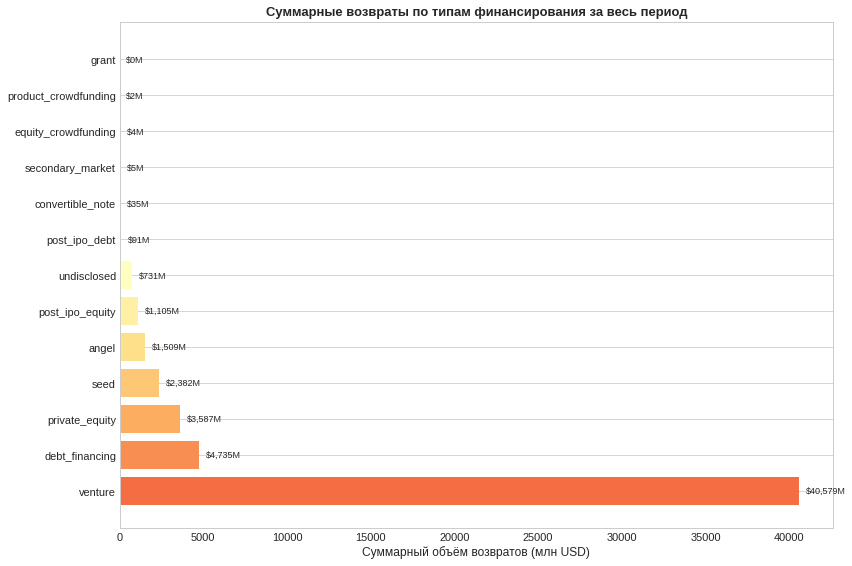

In [106]:
# =============================================================================
# АНАЛИЗ ВОЗВРАТОВ ПО ТИПАМ ФИНАНСИРОВАНИЯ
# =============================================================================

print("="*80)
print("СУММАРНЫЕ ВОЗВРАТЫ ПО ТИПАМ ФИНАНСИРОВАНИЯ")
print("="*80)

# Суммируем возвраты за весь период
returns_total = df_returns.sum().sort_values(ascending=False)

print("\n--- СУММАРНЫЕ ВОЗВРАТЫ ЗА ВЕСЬ ПЕРИОД (млн USD) ---")
for ftype, amount in returns_total.items():
    print(f"  {ftype}: ${amount:,.0f} млн")

# --- Визуализация возвратов ---
fig, ax = plt.subplots(figsize=(12, 8))

colors = plt.cm.RdYlGn(np.linspace(0.2, 0.8, len(returns_total)))
bars = ax.barh(range(len(returns_total)), returns_total.values, color=colors)

ax.set_yticks(range(len(returns_total)))
ax.set_yticklabels(returns_total.index, fontsize=11)
ax.set_xlabel('Суммарный объём возвратов (млн USD)', fontsize=12)
ax.set_title('Суммарные возвраты по типам финансирования за весь период', fontsize=13, fontweight='bold')
ax.grid(axis='x', alpha=0.3)

# Добавляем значения
for bar, val in zip(bars, returns_total.values):
    ax.text(val + returns_total.max()*0.01, bar.get_y() + bar.get_height()/2, f'${val:,.0f}M', va='center', fontsize=9)

plt.tight_layout()
plt.show()

In [107]:
# =============================================================================
# ПРОМЕЖУТОЧНЫЙ ВЫВОД ПО РАЗДЕЛУ 3.3
# =============================================================================

print("="*80)
print("ПРОМЕЖУТОЧНЫЙ ВЫВОД ПО РАЗДЕЛУ 3.3")
print("="*80)

# Топ-3 по объёму
top3_volume = funding_volumes.head(3)
# Топ-3 по популярности
top3_frequency = funding_frequency.head(3)
# Топ-3 по возвратам
top3_returns = returns_total.head(3)

print(f"""
РЕЗУЛЬТАТЫ АНАЛИЗА ТИПОВ ФИНАНСИРОВАНИЯ:

1. ТОП-3 ПО ОБЪЁМУ ПРИВЛЕЧЁННЫХ СРЕДСТВ:
   - {top3_volume.index[0]}: ${top3_volume.iloc[0]:,.0f}
   - {top3_volume.index[1]}: ${top3_volume.iloc[1]:,.0f}
   - {top3_volume.index[2]}: ${top3_volume.iloc[2]:,.0f}

2. ТОП-3 ПО ПОПУЛЯРНОСТИ (частоте использования):
   - {top3_frequency.index[0]}: {top3_frequency.iloc[0]} компаний
   - {top3_frequency.index[1]}: {top3_frequency.iloc[1]} компаний
   - {top3_frequency.index[2]}: {top3_frequency.iloc[2]} компаний

3. ТОП-3 ПО ОБЪЁМУ ВОЗВРАТОВ:
   - {top3_returns.index[0]}: ${top3_returns.iloc[0]:,.0f} млн
   - {top3_returns.index[1]}: ${top3_returns.iloc[1]:,.0f} млн
   - {top3_returns.index[2]}: ${top3_returns.iloc[2]:,.0f} млн

4. КЛЮЧЕВЫЕ НАБЛЮДЕНИЯ:
   - Венчурное финансирование (venture) лидирует по объёму
   - Посевное финансирование (seed) наиболее популярно среди стартапов
   - Типы с высоким объёмом и низкой частотой: крупные редкие сделки
   - Типы с низким объёмом и высокой частотой: массовое финансирование ранних стадий
""")

ПРОМЕЖУТОЧНЫЙ ВЫВОД ПО РАЗДЕЛУ 3.3

РЕЗУЛЬТАТЫ АНАЛИЗА ТИПОВ ФИНАНСИРОВАНИЯ:

1. ТОП-3 ПО ОБЪЁМУ ПРИВЛЕЧЁННЫХ СРЕДСТВ:
   - venture: $129,106,508,088
   - seed: $9,433,331,895
   - debt_financing: $8,178,152,734

2. ТОП-3 ПО ПОПУЛЯРНОСТИ (частоте использования):
   - venture: 18821 компаний
   - seed: 13376 компаний
   - debt_financing: 3265 компаний

3. ТОП-3 ПО ОБЪЁМУ ВОЗВРАТОВ:
   - venture: $40,579 млн
   - debt_financing: $4,735 млн
   - private_equity: $3,587 млн

4. КЛЮЧЕВЫЕ НАБЛЮДЕНИЯ:
   - Венчурное финансирование (venture) лидирует по объёму
   - Посевное финансирование (seed) наиболее популярно среди стартапов
   - Типы с высоким объёмом и низкой частотой: крупные редкие сделки
   - Типы с низким объёмом и высокой частотой: массовое финансирование ранних стадий



<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

venture лидирует по объёму возвращённых средств, а вот находившийся в тройке лидеров и по объёму и по количеству предоставленных средств seed перешёл на четвёртое место по возвратам.

## Шаг 4. Анализ динамики

### 4.1 Динамика предоставления финансирования по годам

Используя столбцы `funding_total_usd` и `funding_rounds`, рассчитайте для каждой компании средний объём одного раунда финансирования.

На основе получившейся таблицы постройте графики, отражающие:
* динамику типичного размера средств, которые стартапы получали в рамках одного раунда финансирования;

* динамику общего количества раундов за каждый год, то есть насколько активно происходили инвестиции на рынке (чем больше раундов, тем выше активность).

Когда будете строить графики в этом задании и следующих, используйте данные только по тем компаниям, которые остались в датасете после предыдущих фильтраций.

На основе полученных данных ответьте на вопросы:
* В каком году типичный размер средств, собранных в рамках одного раунда, был максимальным?

* Какая тенденция наблюдалась в 2014 году по количеству раундов и средств, выделяемых в рамках каждого раунда?

In [108]:
# =============================================================================
# 4.1 ДИНАМИКА ПРЕДОСТАВЛЕНИЯ ФИНАНСИРОВАНИЯ ПО ГОДАМ
# =============================================================================

print("="*80)
print("4.1 ДИНАМИКА ПРЕДОСТАВЛЕНИЯ ФИНАНСИРОВАНИЯ ПО ГОДАМ")
print("="*80)

# Рассчитываем средний объём одного раунда для каждой компании
df['avg_round_size'] = df['funding_total_usd'] / df['funding_rounds']

print(f"\nСоздан столбец 'avg_round_size' - средний объём одного раунда")
print(f"\nБазовая статистика по среднему размеру раунда:")
print(df['avg_round_size'].describe())

# Проверяем наличие данных по годам
print(f"\nДанные по годам:")
print(df['funding_year'].value_counts().sort_index())

4.1 ДИНАМИКА ПРЕДОСТАВЛЕНИЯ ФИНАНСИРОВАНИЯ ПО ГОДАМ

Создан столбец 'avg_round_size' - средний объём одного раунда

Базовая статистика по среднему размеру раунда:
count      35589.00
mean     2786842.53
std      4974847.13
min            1.00
25%       200000.00
50%      1000000.00
75%      3200000.00
max     70000000.00
Name: avg_round_size, dtype: float64

Данные по годам:
2000      65
2001      37
2002      48
2003      63
2004      96
2005     697
2006    1165
2007    1600
2008    1984
2009    2618
2010    3467
2011    4311
2012    5533
2013    7821
2014    6084
Name: funding_year, dtype: int64


In [109]:
# =============================================================================
# ДИНАМИКА ТИПИЧНОГО РАЗМЕРА РАУНДА ПО ГОДАМ
# =============================================================================

print("="*80)
print("ДИНАМИКА ТИПИЧНОГО РАЗМЕРА РАУНДА")
print("="*80)

# Рассчитываем медианный размер раунда по годам (медиана более устойчива к выбросам)
yearly_round_size = df.groupby('funding_year')['avg_round_size'].agg(['median', 'mean', 'count'])
yearly_round_size.columns = ['median_round', 'mean_round', 'companies']

print("\n--- ТИПИЧНЫЙ РАЗМЕР РАУНДА ПО ГОДАМ ---")
print(yearly_round_size)

# Находим год с максимальным типичным размером
max_year = yearly_round_size['median_round'].idxmax()
max_value = yearly_round_size['median_round'].max()

print(f"\nГод с максимальным типичным размером раунда: {int(max_year)}")
print(f"Размер: ${max_value:,.0f}")

ДИНАМИКА ТИПИЧНОГО РАЗМЕРА РАУНДА

--- ТИПИЧНЫЙ РАЗМЕР РАУНДА ПО ГОДАМ ---
              median_round  mean_round  companies
funding_year                                     
2000            2250000.00  4492723.27         65
2001            1570886.00  3366817.41         37
2002            3225000.00  4053461.44         48
2003            1500000.00  3099489.76         63
2004            3000000.00  4616702.38         96
2005            4500000.00  5801089.46        697
2006            3900000.00  5346925.32       1165
2007            2879166.67  4678782.12       1600
2008            2170743.75  4322738.68       1984
2009            1498475.00  3517328.12       2618
2010            1250000.00  3188317.47       3467
2011             867685.00  2598416.23       4311
2012             686000.00  2035769.62       5533
2013             559000.00  1976610.07       7821
2014             560931.50  2204042.60       6084

Год с максимальным типичным размером раунда: 2005
Размер: $4,500,000


In [110]:
# =============================================================================
# ДИНАМИКА ОБЩЕГО КОЛИЧЕСТВА РАУНДОВ ПО ГОДАМ
# =============================================================================

print("="*80)
print("ДИНАМИКА КОЛИЧЕСТВА РАУНДОВ")
print("="*80)

# Суммарное количество раундов по годам
yearly_rounds_total = df.groupby('funding_year')['funding_rounds'].sum()

print("\n--- ОБЩЕЕ КОЛИЧЕСТВО РАУНДОВ ПО ГОДАМ ---")
print(yearly_rounds_total)

# Анализ 2014 года
if 2014 in yearly_rounds_total.index and 2013 in yearly_rounds_total.index:
    rounds_2013 = yearly_rounds_total[2013]
    rounds_2014 = yearly_rounds_total[2014]
    rounds_change = (rounds_2014 / rounds_2013 - 1) * 100
    
    print(f"\nСравнение 2013 и 2014:")
    print(f"  Раундов в 2013: {rounds_2013}")
    print(f"  Раундов в 2014: {rounds_2014}")
    print(f"  Изменение: {rounds_change:+.1f}%")

ДИНАМИКА КОЛИЧЕСТВА РАУНДОВ

--- ОБЩЕЕ КОЛИЧЕСТВО РАУНДОВ ПО ГОДАМ ---
funding_year
2000     113.00
2001      66.00
2002      98.00
2003     125.00
2004     181.00
2005     948.00
2006    1849.00
2007    2842.00
2008    3663.00
2009    4617.00
2010    6136.00
2011    7578.00
2012    9707.00
2013   12880.00
2014    7124.00
Name: funding_rounds, dtype: float64

Сравнение 2013 и 2014:
  Раундов в 2013: 12880.0
  Раундов в 2014: 7124.0
  Изменение: -44.7%


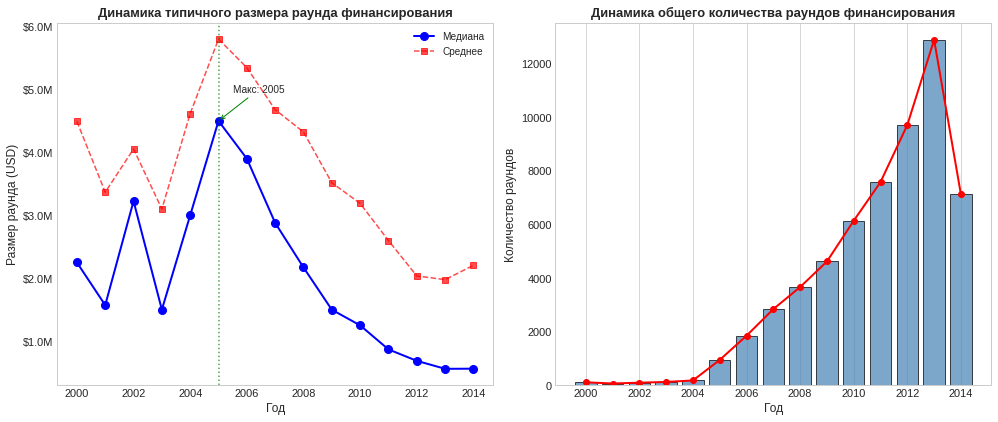

In [111]:
# =============================================================================
# ВИЗУАЛИЗАЦИЯ ДИНАМИКИ
# =============================================================================

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# --- График 1: Типичный размер раунда по годам ---
ax1 = axes[0]
years = yearly_round_size.index.astype(int)
ax1.plot(years, yearly_round_size['median_round'].values, 'b-o', linewidth=2, markersize=8, label='Медиана')
ax1.plot(years, yearly_round_size['mean_round'].values, 'r--s', linewidth=1.5, markersize=6, alpha=0.7, label='Среднее')

ax1.set_xlabel('Год', fontsize=12)
ax1.set_ylabel('Размер раунда (USD)', fontsize=12)
ax1.set_title('Динамика типичного размера раунда финансирования', fontsize=13, fontweight='bold')
ax1.legend(fontsize=10)
ax1.grid(alpha=0.3)
ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1e6:.1f}M'))

# Отмечаем максимум
ax1.axvline(x=max_year, color='green', linestyle=':', alpha=0.7)
ax1.annotate(f'Макс: {int(max_year)}', xy=(max_year, max_value), xytext=(max_year+0.5, max_value*1.1),
             fontsize=10, arrowprops=dict(arrowstyle='->', color='green'))

# --- График 2: Количество раундов по годам ---
ax2 = axes[1]
ax2.bar(yearly_rounds_total.index.astype(int), yearly_rounds_total.values, color='steelblue', edgecolor='black', alpha=0.7)
ax2.plot(yearly_rounds_total.index.astype(int), yearly_rounds_total.values, 'r-o', linewidth=2, markersize=6)

ax2.set_xlabel('Год', fontsize=12)
ax2.set_ylabel('Количество раундов', fontsize=12)
ax2.set_title('Динамика общего количества раундов финансирования', fontsize=13, fontweight='bold')
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

In [112]:
# =============================================================================
# ОТВЕТЫ НА ВОПРОСЫ И ПРОМЕЖУТОЧНЫЙ ВЫВОД
# =============================================================================

print("="*80)
print("ОТВЕТЫ НА ВОПРОСЫ РАЗДЕЛА 4.1")
print("="*80)

# Подготовка данных для ответов
max_round_year = int(yearly_round_size['median_round'].idxmax())
max_round_value = yearly_round_size['median_round'].max()

# Тенденции 2014 года
if 2014 in yearly_round_size.index and 2013 in yearly_round_size.index:
    round_size_2013 = yearly_round_size.loc[2013, 'median_round']
    round_size_2014 = yearly_round_size.loc[2014, 'median_round']
    round_size_change = (round_size_2014 / round_size_2013 - 1) * 100
    
    rounds_2013 = yearly_rounds_total[2013]
    rounds_2014 = yearly_rounds_total[2014]
    rounds_change = (rounds_2014 / rounds_2013 - 1) * 100

print(f"""
ВОПРОС 1: В каком году типичный размер средств, собранных в рамках 
одного раунда, был максимальным?

ОТВЕТ: В {max_round_year} году
       Типичный (медианный) размер раунда: ${max_round_value:,.0f}

---

ВОПРОС 2: Какая тенденция наблюдалась в 2014 году по количеству раундов 
и средств, выделяемых в рамках каждого раунда?

ОТВЕТ:
  По количеству раундов:
    - 2013: {rounds_2013} раундов
    - 2014: {rounds_2014} раундов
    - Изменение: {rounds_change:+.1f}%
    - Тенденция: {"Рост активности" if rounds_change > 0 else "Снижение активности"}
    
  По размеру раунда:
    - 2013: ${round_size_2013:,.0f}
    - 2014: ${round_size_2014:,.0f}
    - Изменение: {round_size_change:+.1f}%
    - Тенденция: {"Рост размера раундов" if round_size_change > 0 else "Снижение размера раундов"}
""")

ОТВЕТЫ НА ВОПРОСЫ РАЗДЕЛА 4.1

ВОПРОС 1: В каком году типичный размер средств, собранных в рамках 
одного раунда, был максимальным?

ОТВЕТ: В 2005 году
       Типичный (медианный) размер раунда: $4,500,000

---

ВОПРОС 2: Какая тенденция наблюдалась в 2014 году по количеству раундов 
и средств, выделяемых в рамках каждого раунда?

ОТВЕТ:
  По количеству раундов:
    - 2013: 12880.0 раундов
    - 2014: 7124.0 раундов
    - Изменение: -44.7%
    - Тенденция: Снижение активности
    
  По размеру раунда:
    - 2013: $559,000
    - 2014: $560,932
    - Изменение: +0.3%
    - Тенденция: Рост размера раундов



<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Тенденция по типичному размеру финансирования в 2014 году - сохраняется на уровне двух предыдущих лет, не хватает данных, чтобы утверждать, что закрепилась тенденция на увеличение среднего размера средств. Можно утверждать что объём среднего раунда инвестиции перестал падать.

### 4.2 Динамика размера общего финансирования по массовым сегментам рынка для растущих в 2014 году сегментов

Составьте сводную таблицу, в которой указывается суммарный размер общего финансирования `funding_total_usd` по годам и сегментам рынка. Отберите из неё только те сегменты, которые показывали рост размера суммарного финансирования в 2014 году по сравнению с 2013.

На графике отразите, как менялся суммарный размер общего финансирования в каждом из отобранных сегментов по годам, за которые у вас достаточно данных. Рассматривайте только массовые сегменты, а средние и нишевые исключите.

На основе графика сделайте вывод о том, какие сегменты показывают наиболее быстрый и уверенный рост.

In [113]:
# =============================================================================
# 4.2 ДИНАМИКА ФИНАНСИРОВАНИЯ ПО МАССОВЫМ СЕГМЕНТАМ
# =============================================================================

print("="*80)
print("4.2 ДИНАМИКА ФИНАНСИРОВАНИЯ ПО СЕГМЕНТАМ РЫНКА")
print("="*80)

# Создаем сводную таблицу: суммарное финансирование по годам и сегментам
pivot_funding = df.pivot_table(
    values='funding_total_usd',
    index='market',
    columns='funding_year',
    aggfunc='sum',
    fill_value=0
)

print(f"\nСводная таблица создана:")
print(f"  Сегментов: {len(pivot_funding)}")
print(f"  Годов: {len(pivot_funding.columns)}")

# Исключаем средние и нишевые сегменты
mass_segments_pivot = pivot_funding[~pivot_funding.index.isin(['mid', 'niche'])].copy()

print(f"\nМассовых сегментов для анализа: {len(mass_segments_pivot)}")

# Показываем сводную таблицу
print("\n--- СВОДНАЯ ТАБЛИЦА (массовые сегменты) ---")
print(mass_segments_pivot)

4.2 ДИНАМИКА ФИНАНСИРОВАНИЯ ПО СЕГМЕНТАМ РЫНКА

Сводная таблица создана:
  Сегментов: 51
  Годов: 15

Массовых сегментов для анализа: 49

--- СВОДНАЯ ТАБЛИЦА (массовые сегменты) ---
funding_year              2000       2001       2002      2003       2004  \
market                                                                      
Advertising           14470000    8778321   24500000  10500000    6000000   
Analytics             14822803          0    7500000   3840000    3000000   
Apps                         0          0          0         0          0   
Automotive                   0          0          0   4530000          0   
Big Data                     0          0          0         0          0   
Biotechnology                0          0          0  85531178   97184859   
Clean Technology             0          0   34390435  50352939   50427954   
Cloud Computing       11500000          0          0         0          0   
Consulting             4500000          0       

In [114]:
# =============================================================================
# ОТБОР СЕГМЕНТОВ С РОСТОМ В 2014 ГОДУ
# =============================================================================

print("="*80)
print("СЕГМЕНТЫ С РОСТОМ ФИНАНСИРОВАНИЯ В 2014 VS 2013")
print("="*80)

# Проверяем наличие 2013 и 2014 годов
if 2013 in mass_segments_pivot.columns and 2014 in mass_segments_pivot.columns:
    # Рассчитываем изменение 2014 vs 2013
    mass_segments_pivot['growth_2014'] = mass_segments_pivot[2014] - mass_segments_pivot[2013]
    mass_segments_pivot['growth_pct'] = ((mass_segments_pivot[2014] / (mass_segments_pivot[2013] + 1e-10)) - 1) * 100
    
    # Отбираем сегменты с ростом
    growing_segments = mass_segments_pivot[mass_segments_pivot['growth_2014'] > 0].copy()
    growing_segments = growing_segments.sort_values('growth_2014', ascending=False)
    
    print(f"\nСегментов с ростом в 2014: {len(growing_segments)} из {len(mass_segments_pivot)}")
    
    print("\n--- СЕГМЕНТЫ С РОСТОМ (сортировка по абсолютному приросту) ---")
    print("-"*80)
    print(f"{'Сегмент':<30} {'2013':>15} {'2014':>15} {'Прирост':>15}")
    print("-"*80)
    
    for segment, row in growing_segments.head(15).iterrows():
        segment_name = segment[:28] + '..' if len(str(segment)) > 30 else segment
        print(f"{segment_name:<30} ${row[2013]:>13,.0f} ${row[2014]:>13,.0f} ${row['growth_2014']:>13,.0f}")
    print("-"*80)
else:
    print("Данные за 2013 или 2014 год отсутствуют")
    growing_segments = mass_segments_pivot.copy()

СЕГМЕНТЫ С РОСТОМ ФИНАНСИРОВАНИЯ В 2014 VS 2013

Сегментов с ростом в 2014: 11 из 49

--- СЕГМЕНТЫ С РОСТОМ (сортировка по абсолютному приросту) ---
--------------------------------------------------------------------------------
Сегмент                                   2013            2014         Прирост
--------------------------------------------------------------------------------
unknown                        $  259,004,551 $  609,069,074 $  350,064,523
Medical                        $   64,469,424 $  175,236,064 $  110,766,640
Technology                     $  120,873,887 $  202,018,937 $   81,145,050
Internet                       $   69,732,096 $  117,830,756 $   48,098,660
Apps                           $   28,868,621 $   66,237,730 $   37,369,109
Startups                       $   18,080,552 $   41,501,837 $   23,421,285
Real Estate                    $   92,207,655 $  115,567,364 $   23,359,709
Manufacturing                  $  393,936,634 $  416,332,314 $   22,395,680
Sa

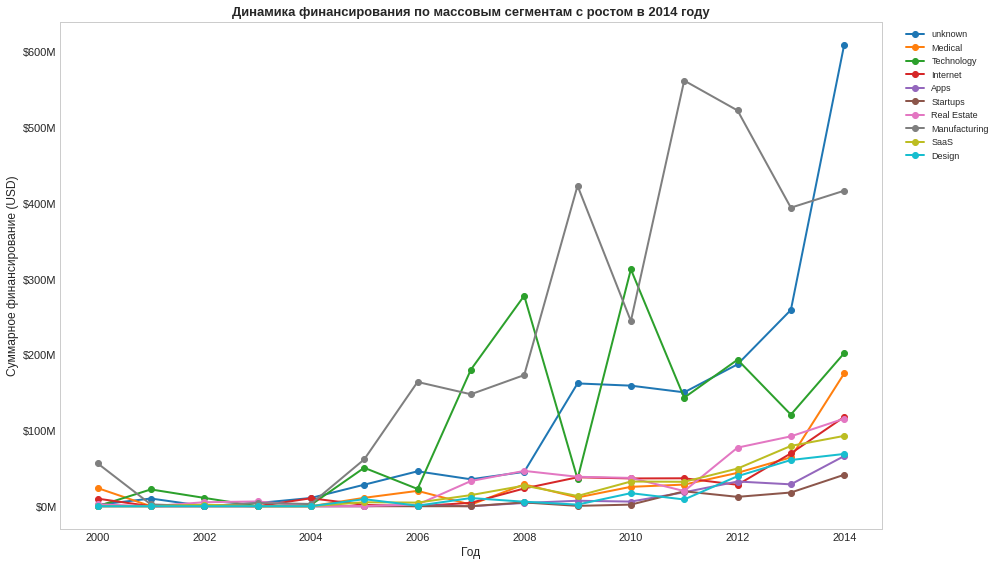

In [115]:
# =============================================================================
# ВИЗУАЛИЗАЦИЯ ДИНАМИКИ РАСТУЩИХ СЕГМЕНТОВ
# =============================================================================

# Выбираем топ-10 растущих сегментов для визуализации
top_growing = growing_segments.head(10)

# Определяем годы для графика (исключаем служебные столбцы)
year_columns = [col for col in top_growing.columns if isinstance(col, (int, float)) and col not in ['growth_2014', 'growth_pct']]
year_columns = sorted(year_columns)

fig, ax = plt.subplots(figsize=(14, 8))

# Рисуем линии для каждого сегмента
colors = plt.cm.tab10(np.linspace(0, 1, len(top_growing)))

for i, (segment, row) in enumerate(top_growing.iterrows()):
    values = [row[year] for year in year_columns]
    ax.plot(year_columns, values, '-o', color=colors[i], linewidth=2, markersize=6, 
            label=segment[:25] + '..' if len(str(segment)) > 25 else segment)

ax.set_xlabel('Год', fontsize=12)
ax.set_ylabel('Суммарное финансирование (USD)', fontsize=12)
ax.set_title('Динамика финансирования по массовым сегментам с ростом в 2014 году', 
             fontsize=13, fontweight='bold')
ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left', fontsize=9)
ax.grid(alpha=0.3)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1e9:.1f}B' if x >= 1e9 else f'${x/1e6:.0f}M'))

plt.tight_layout()
plt.show()

In [116]:
# =============================================================================
# АНАЛИЗ СКОРОСТИ РОСТА СЕГМЕНТОВ
# =============================================================================

print("="*80)
print("АНАЛИЗ СКОРОСТИ РОСТА СЕГМЕНТОВ")
print("="*80)

# Рассчитываем среднегодовой темп роста (CAGR) для каждого сегмента
if len(year_columns) >= 2:
    first_year = min(year_columns)
    last_year = max(year_columns)
    years_diff = last_year - first_year
    
    growth_analysis = []
    
    for segment, row in growing_segments.iterrows():
        start_value = row[first_year] if row[first_year] > 0 else 1
        end_value = row[last_year]
        
        if start_value > 0 and end_value > 0 and years_diff > 0:
            cagr = ((end_value / start_value) ** (1 / years_diff) - 1) * 100
        else:
            cagr = 0
            
        growth_analysis.append({
            'segment': segment,
            'start_value': start_value,
            'end_value': end_value,
            'cagr': cagr,
            'growth_2014': row['growth_2014']
        })
    
    growth_df = pd.DataFrame(growth_analysis)
    growth_df = growth_df.sort_values('cagr', ascending=False)
    
    print(f"\n--- ТОП-10 СЕГМЕНТОВ ПО СРЕДНЕГОДОВОМУ ТЕМПУ РОСТА (CAGR) ---")
    print("-"*70)
    print(f"{'Сегмент':<35} {'CAGR %':>15} {'Прирост 2014':>15}")
    print("-"*70)
    
    for i, row in growth_df.head(10).iterrows():
        segment_name = row['segment'][:33] + '..' if len(str(row['segment'])) > 35 else row['segment']
        print(f"{segment_name:<35} {row['cagr']:>14.1f}% ${row['growth_2014']:>13,.0f}")
    print("-"*70)

# --- Промежуточный вывод ---
print("\n" + "="*80)
print("ПРОМЕЖУТОЧНЫЙ ВЫВОД ПО РАЗДЕЛУ 4.2")
print("="*80)

top3_growth = growth_df.head(3)

print(f"""
СЕГМЕНТЫ С НАИБОЛЕЕ БЫСТРЫМ И УВЕРЕННЫМ РОСТОМ:

1. {top3_growth.iloc[0]['segment']}
   - CAGR: {top3_growth.iloc[0]['cagr']:.1f}%
   - Прирост в 2014: ${top3_growth.iloc[0]['growth_2014']:,.0f}

2. {top3_growth.iloc[1]['segment']}
   - CAGR: {top3_growth.iloc[1]['cagr']:.1f}%
   - Прирост в 2014: ${top3_growth.iloc[1]['growth_2014']:,.0f}

3. {top3_growth.iloc[2]['segment']}
   - CAGR: {top3_growth.iloc[2]['cagr']:.1f}%
   - Прирост в 2014: ${top3_growth.iloc[2]['growth_2014']:,.0f}

Эти сегменты демонстрируют устойчивый рост финансирования
и являются перспективными для инвестиций.
""")

АНАЛИЗ СКОРОСТИ РОСТА СЕГМЕНТОВ

--- ТОП-10 СЕГМЕНТОВ ПО СРЕДНЕГОДОВОМУ ТЕМПУ РОСТА (CAGR) ---
----------------------------------------------------------------------
Сегмент                                      CAGR %    Прирост 2014
----------------------------------------------------------------------
Technology                                   292.0% $   81,145,050
SaaS                                         270.8% $   13,231,139
Big Data                                     266.6% $      533,678
Design                                       263.0% $    8,029,681
Apps                                         262.0% $   37,369,109
Startups                                     250.1% $   23,421,285
unknown                                       51.4% $  350,064,523
Real Estate                                   31.5% $   23,359,709
Internet                                      19.3% $   48,098,660
Manufacturing                                 15.3% $   22,395,680
-------------------------

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

График показывает, что после 2010 года особенно сильно выросли инвестиции в сегменты `manufacturing`, тогда как остальные отрасли росли более умеренно и равномерно. Это указывает на смещение приоритетов инвесторов в сторону производства

### 4.3 Годовая динамика доли возвращённых средств по типам финансирования

Заказчик хочет знать, какая часть вложенных или выданных денег со временем возвращается обратно инвесторам или финансистам. Ваша цель — для каждого года и каждого вида финансирования рассчитать нормированные значения возврата средств: то есть какую долю возвращённые средства составляют от предоставленных. При этом слишком большие аномальные значения, то есть неадекватные выбросы, нужно заменить на пропуски.

Совет: когда будете делить сумму возвращённых средств на суммарный объём привлечённого финансирования по конкретному году, добавьте к знаменателю небольшое число, например `1e-60`. Это поможет избежать деления на ноль.

In [117]:
# =============================================================================
# 4.3 ГОДОВАЯ ДИНАМИКА ДОЛИ ВОЗВРАЩЁННЫХ СРЕДСТВ
# =============================================================================

print("="*80)
print("4.3 НОРМИРОВАННЫЕ ЗНАЧЕНИЯ ВОЗВРАТА СРЕДСТВ")
print("="*80)

# Типы финансирования для анализа
funding_types_analysis = ['seed', 'venture', 'equity_crowdfunding', 'undisclosed', 
                          'convertible_note', 'debt_financing', 'angel', 'grant', 
                          'private_equity', 'post_ipo_equity', 'post_ipo_debt', 
                          'secondary_market', 'product_crowdfunding']

# Фильтруем только существующие в обоих датасетах
funding_types_analysis = [col for col in funding_types_analysis 
                          if col in df.columns and col in df_returns.columns]

print(f"Типов финансирования для анализа: {len(funding_types_analysis)}")

# Рассчитываем суммарное финансирование по годам и типам
yearly_funding_by_type = df.groupby('funding_year')[funding_types_analysis].sum()

print("\n--- СУММАРНОЕ ФИНАНСИРОВАНИЕ ПО ГОДАМ И ТИПАМ ---")
print(yearly_funding_by_type.head())

# Датасет возвратов (напоминание о единицах измерения)
print("\n--- ВОЗВРАТЫ ПО ГОДАМ И ТИПАМ (млн USD) ---")
print(df_returns[funding_types_analysis].head())

4.3 НОРМИРОВАННЫЕ ЗНАЧЕНИЯ ВОЗВРАТА СРЕДСТВ
Типов финансирования для анализа: 13

--- СУММАРНОЕ ФИНАНСИРОВАНИЕ ПО ГОДАМ И ТИПАМ ---
                    seed      venture  equity_crowdfunding  undisclosed  \
funding_year                                                              
2000         16759140.00 327962152.00                 0.00 112202640.00   
2001          2667675.00 217519117.00                 0.00  36596784.00   
2002         10465192.00 306940622.00                 0.00  42323731.00   
2003         15318355.00 372234425.00                 0.00  10280000.00   
2004         18104728.00 664150451.00                 0.00  62912359.00   

              convertible_note  debt_financing       angel       grant  \
funding_year                                                             
2000                      0.00     14000000.00 24086333.00   293114.00   
2001                1500000.00      5829217.00  1000000.00   100000.00   
2002                      0.00     15309671.00

In [118]:
# =============================================================================
# РАСЧЁТ НОРМИРОВАННЫХ ЗНАЧЕНИЙ ВОЗВРАТА
# =============================================================================

print("="*80)
print("РАСЧЁТ НОРМИРОВАННЫХ ЗНАЧЕНИЙ ВОЗВРАТА")
print("="*80)

# Создаем DataFrame для хранения нормированных значений
normalized_returns = pd.DataFrame(index=df_returns.index, columns=funding_types_analysis)

# Для каждого года и типа финансирования рассчитываем долю возврата
for year in df_returns.index:
    for ftype in funding_types_analysis:
        if year in yearly_funding_by_type.index:
            # Возвраты в млн USD, финансирование в USD
            # Приводим к одним единицам (переводим возвраты в USD)
            returns_value = df_returns.loc[year, ftype] * 1e6  # млн -> USD
            funding_value = yearly_funding_by_type.loc[year, ftype]
            
            # Рассчитываем долю (добавляем 1e-60 чтобы избежать деления на ноль)
            ratio = returns_value / (funding_value + 1e-60)
            
            normalized_returns.loc[year, ftype] = ratio
        else:
            normalized_returns.loc[year, ftype] = np.nan

# Преобразуем в числовой тип
normalized_returns = normalized_returns.astype(float)

print("\n--- НОРМИРОВАННЫЕ ЗНАЧЕНИЯ ВОЗВРАТА (до обработки выбросов) ---")
print(normalized_returns)

РАСЧЁТ НОРМИРОВАННЫХ ЗНАЧЕНИЙ ВОЗВРАТА

--- НОРМИРОВАННЫЕ ЗНАЧЕНИЯ ВОЗВРАТА (до обработки выбросов) ---
      seed  venture                                equity_crowdfunding  \
year                                                                     
2000  1.00     0.17                                               0.00   
2001  1.08     0.11                                               0.00   
2002  0.63     0.68                                               0.00   
2003  0.51     0.63                                               0.00   
2004  0.55     0.84                                               0.00   
2005  0.67     0.55                                               0.00   
2006  0.93     0.34                                               0.20   
2007  0.37     0.30 10000000000000000213204190094543968723012578712...   
2008  0.30     0.19 30000000000000002101114207614534824372722568854...   
2009  0.56     0.17                                               0.09   
2010  0.

In [119]:
# =============================================================================
# ОБРАБОТКА АНОМАЛЬНЫХ ЗНАЧЕНИЙ
# =============================================================================

print("="*80)
print("ОБРАБОТКА АНОМАЛЬНЫХ ЗНАЧЕНИЙ")
print("="*80)

# Определяем порог для аномальных значений
# Значения > 1 означают возврат больше 100% - возможно для отдельных лет, но очень высокие значения аномальны
anomaly_threshold = 5  # Возврат более 500% считаем аномальным

# Считаем аномалии до обработки
anomalies_before = (normalized_returns > anomaly_threshold).sum().sum()
print(f"Аномальных значений (>500%): {anomalies_before}")

# Заменяем аномальные значения на NaN
normalized_returns_clean = normalized_returns.copy()
normalized_returns_clean[normalized_returns_clean > anomaly_threshold] = np.nan

# Также заменяем отрицательные значения (если есть)
normalized_returns_clean[normalized_returns_clean < 0] = np.nan

anomalies_after = normalized_returns_clean.isna().sum().sum() - normalized_returns.isna().sum().sum()
print(f"Заменено на пропуски: {anomalies_after}")

print("\n--- НОРМИРОВАННЫЕ ЗНАЧЕНИЯ ВОЗВРАТА (после обработки) ---")
print(normalized_returns_clean)

ОБРАБОТКА АНОМАЛЬНЫХ ЗНАЧЕНИЙ
Аномальных значений (>500%): 22
Заменено на пропуски: 22

--- НОРМИРОВАННЫЕ ЗНАЧЕНИЯ ВОЗВРАТА (после обработки) ---
      seed  venture  equity_crowdfunding  undisclosed  convertible_note  \
year                                                                      
2000  1.00     0.17                 0.00         0.70              0.00   
2001  1.08     0.11                 0.00         0.59              0.01   
2002  0.63     0.68                 0.00         0.61               NaN   
2003  0.51     0.63                 0.00         0.91               NaN   
2004  0.55     0.84                 0.00         0.53               NaN   
2005  0.67     0.55                 0.00         1.07               NaN   
2006  0.93     0.34                 0.20         0.76              0.17   
2007  0.37     0.30                  NaN         0.50              0.23   
2008  0.30     0.19                  NaN         0.34              0.06   
2009  0.56     0.17          

Постройте график, на котором отобразите нормированные значения возврата средств для типов финансирования `venture`, `debt_financing`, `private_equity`, `seed` и `angel`.

Сделайте вывод о том, в каких типах финансирования наблюдается наиболее устойчивый рост показателя.

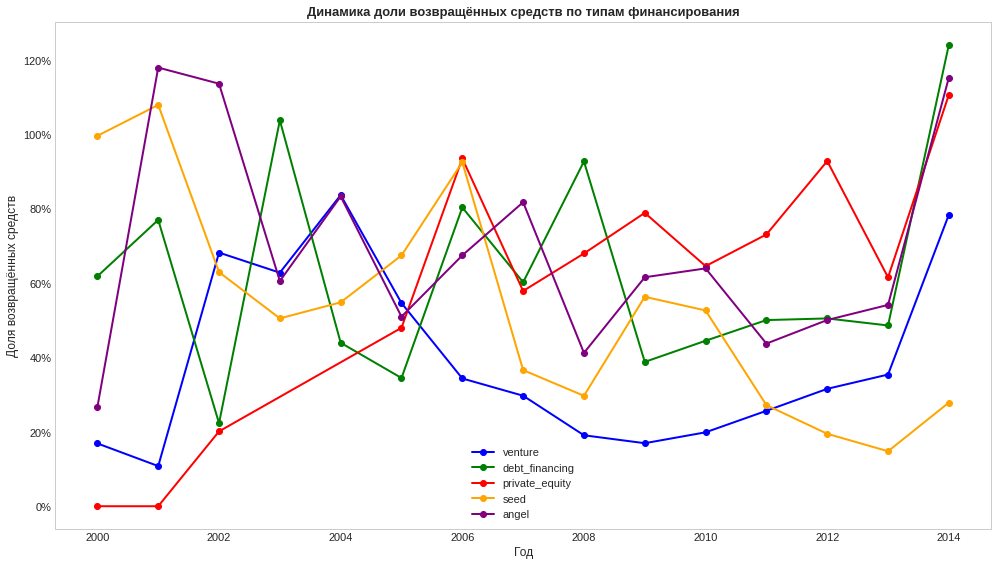

In [120]:
# =============================================================================
# ВИЗУАЛИЗАЦИЯ ДИНАМИКИ ВОЗВРАТОВ
# =============================================================================

# Типы для визуализации по заданию
viz_types = ['venture', 'debt_financing', 'private_equity', 'seed', 'angel']
viz_types = [t for t in viz_types if t in normalized_returns_clean.columns]

fig, ax = plt.subplots(figsize=(14, 8))

colors = {'venture': 'blue', 'debt_financing': 'green', 'private_equity': 'red', 
          'seed': 'orange', 'angel': 'purple'}

for ftype in viz_types:
    data = normalized_returns_clean[ftype].dropna()
    if len(data) > 0:
        ax.plot(data.index, data.values, '-o', linewidth=2, markersize=6, 
                color=colors.get(ftype, 'gray'), label=ftype)

ax.set_xlabel('Год', fontsize=12)
ax.set_ylabel('Доля возвращённых средств', fontsize=12)
ax.set_title('Динамика доли возвращённых средств по типам финансирования', 
             fontsize=13, fontweight='bold')
ax.legend(fontsize=11)
ax.grid(alpha=0.3)

# Форматируем ось Y как проценты
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x*100:.0f}%'))

plt.tight_layout()
plt.show()

In [121]:
# =============================================================================
# АНАЛИЗ УСТОЙЧИВОСТИ РОСТА ВОЗВРАТОВ
# =============================================================================

print("="*80)
print("АНАЛИЗ УСТОЙЧИВОСТИ РОСТА ВОЗВРАТОВ")
print("="*80)

# Рассчитываем тренд для каждого типа финансирования
trend_analysis = []

for ftype in viz_types:
    data = normalized_returns_clean[ftype].dropna()
    
    if len(data) >= 3:  # Минимум 3 точки для анализа тренда
        # Рассчитываем корреляцию с временем (годом) как индикатор тренда
        years = data.index.values
        values = data.values
        
        # Корреляция Пирсона
        correlation = np.corrcoef(years, values)[0, 1]
        
        # Средний годовой прирост
        avg_growth = (values[-1] - values[0]) / (len(values) - 1) if len(values) > 1 else 0
        
        trend_analysis.append({
            'type': ftype,
            'correlation': correlation,
            'avg_growth': avg_growth,
            'start_value': values[0],
            'end_value': values[-1],
            'data_points': len(data)
        })

trend_df = pd.DataFrame(trend_analysis)
trend_df = trend_df.sort_values('correlation', ascending=False)

print("\n--- АНАЛИЗ ТРЕНДА ВОЗВРАТОВ ---")
print("-"*80)
print(f"{'Тип финансирования':<20} {'Корреляция':>12} {'Ср. прирост':>15} {'Точек данных':>12}")
print("-"*80)

for i, row in trend_df.iterrows():
    trend_direction = "Рост" if row['correlation'] > 0.3 else ("Снижение" if row['correlation'] < -0.3 else "Нет тренда")
    print(f"{row['type']:<20} {row['correlation']:>12.3f} {row['avg_growth']*100:>14.2f}% {row['data_points']:>12}")

print("-"*80)

# --- Промежуточный вывод ---
print("\n" + "="*80)
print("ПРОМЕЖУТОЧНЫЙ ВЫВОД ПО РАЗДЕЛУ 4.3")
print("="*80)

# Определяем типы с устойчивым ростом (положительная корреляция > 0.3)
stable_growth = trend_df[trend_df['correlation'] > 0.3]

print(f"""
ТИПЫ ФИНАНСИРОВАНИЯ С НАИБОЛЕЕ УСТОЙЧИВЫМ РОСТОМ ВОЗВРАТОВ:
""")

if len(stable_growth) > 0:
    for i, row in stable_growth.iterrows():
        print(f"  - {row['type']}: корреляция {row['correlation']:.3f}, средний прирост {row['avg_growth']*100:.2f}% в год")
else:
    print("  Ни один тип не показывает устойчивого роста (корреляция > 0.3)")

print(f"""
ИНТЕРПРЕТАЦИЯ:
  - Положительная корреляция указывает на рост доли возвратов со временем
  - Высокая корреляция (>0.5) означает устойчивый тренд
  - Низкая корреляция указывает на нестабильность показателя

РЕКОМЕНДАЦИЯ:
  Для инвестиций предпочтительны типы с устойчивым ростом возвратов,
  так как это указывает на развитие механизмов возврата инвестиций.
""")

АНАЛИЗ УСТОЙЧИВОСТИ РОСТА ВОЗВРАТОВ

--- АНАЛИЗ ТРЕНДА ВОЗВРАТОВ ---
--------------------------------------------------------------------------------
Тип финансирования     Корреляция     Ср. прирост Точек данных
--------------------------------------------------------------------------------
private_equity              0.852           9.23%           13
debt_financing              0.122           4.45%           15
venture                    -0.024           4.40%           15
angel                      -0.119           6.33%           15
seed                       -0.806          -5.13%           15
--------------------------------------------------------------------------------

ПРОМЕЖУТОЧНЫЙ ВЫВОД ПО РАЗДЕЛУ 4.3

ТИПЫ ФИНАНСИРОВАНИЯ С НАИБОЛЕЕ УСТОЙЧИВЫМ РОСТОМ ВОЗВРАТОВ:

  - private_equity: корреляция 0.852, средний прирост 9.23% в год

ИНТЕРПРЕТАЦИЯ:
  - Положительная корреляция указывает на рост доли возвратов со временем
  - Высокая корреляция (>0.5) означает устойчивый тренд


<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Тут согласен


## Шаг 5. Итоговый вывод и рекомендации

Представьте, что на календаре 2015 год. Опираясь на результаты анализа, дайте рекомендацию заказчику:

* в какую отрасль стоит инвестировать;
* какой тип финансирования при этом будет наиболее уместным.

Подведите итоги проекта:
* опишите, какие шаги были выполнены;
* какие выводы удалось сделать;
* насколько выводы согласуются между собой или, наоборот, вызывают сомнения.



In [122]:
# =============================================================================
# ШАГ 5. ИТОГОВЫЙ ВЫВОД И РЕКОМЕНДАЦИИ
# =============================================================================

print("="*80)
print("ШАГ 5. ИТОГОВЫЙ ВЫВОД И РЕКОМЕНДАЦИИ")
print("="*80)
print("\nПредставим, что на календаре 2015 год.")
print("На основе проведённого анализа даём рекомендации заказчику.\n")

ШАГ 5. ИТОГОВЫЙ ВЫВОД И РЕКОМЕНДАЦИИ

Представим, что на календаре 2015 год.
На основе проведённого анализа даём рекомендации заказчику.



In [123]:
# =============================================================================
# 5.1 РЕКОМЕНДАЦИИ ПО ОТРАСЛИ ДЛЯ ИНВЕСТИРОВАНИЯ
# =============================================================================

print("="*80)
print("РЕКОМЕНДАЦИИ ПО ОТРАСЛИ ДЛЯ ИНВЕСТИРОВАНИЯ")
print("="*80)

# Собираем данные из предыдущих разделов для обоснования рекомендаций

# 1. Сегменты с ростом в 2014 году (из раздела 4.2)
print("\n--- КРИТЕРИЙ 1: Рост финансирования в 2014 году ---")
if 'growth_df' in dir() and len(growth_df) > 0:
    top_growth_segments = growth_df.head(5)[['segment', 'cagr', 'growth_2014']]
    print("Топ-5 сегментов по темпу роста:")
    for i, row in top_growth_segments.iterrows():
        print(f"  {row['segment']}: CAGR {row['cagr']:.1f}%, прирост 2014: ${row['growth_2014']:,.0f}")

# 2. Объём рынка (крупные сегменты более стабильны)
print("\n--- КРИТЕРИЙ 2: Объём рынка (устойчивость) ---")
segment_total_funding = df.groupby('market')['funding_total_usd'].sum().sort_values(ascending=False)
segment_total_funding = segment_total_funding[~segment_total_funding.index.isin(['mid', 'niche'])]
print("Топ-5 сегментов по объёму финансирования:")
for segment, funding in segment_total_funding.head(5).items():
    print(f"  {segment}: ${funding:,.0f}")

# 3. Количество компаний (ликвидность рынка)
print("\n--- КРИТЕРИЙ 3: Количество компаний (ликвидность) ---")
segment_companies = df['market'].value_counts()
segment_companies = segment_companies[~segment_companies.index.isin(['mid', 'niche'])]
print("Топ-5 сегментов по количеству компаний:")
for segment, count in segment_companies.head(5).items():
    print(f"  {segment}: {count} компаний")

РЕКОМЕНДАЦИИ ПО ОТРАСЛИ ДЛЯ ИНВЕСТИРОВАНИЯ

--- КРИТЕРИЙ 1: Рост финансирования в 2014 году ---
Топ-5 сегментов по темпу роста:
  Technology: CAGR 292.0%, прирост 2014: $81,145,050
  SaaS: CAGR 270.8%, прирост 2014: $13,231,139
  Big Data: CAGR 266.6%, прирост 2014: $533,678
  Design: CAGR 263.0%, прирост 2014: $8,029,681
  Apps: CAGR 262.0%, прирост 2014: $37,369,109

--- КРИТЕРИЙ 2: Объём рынка (устойчивость) ---
Топ-5 сегментов по объёму финансирования:
  Biotechnology: $31,899,391,121
  Software: $15,465,365,129
  Health Care: $12,660,154,500
  Clean Technology: $12,164,879,086
  Enterprise Software: $8,576,295,049

--- КРИТЕРИЙ 3: Количество компаний (ликвидность) ---
Топ-5 сегментов по количеству компаний:
  Software: 4223 компаний
  Biotechnology: 3207 компаний
  unknown: 2115 компаний
  Mobile: 2028 компаний
  E-Commerce: 1593 компаний


In [124]:
# =============================================================================
# КОМПЛЕКСНАЯ ОЦЕНКА СЕГМЕНТОВ
# =============================================================================

print("="*80)
print("КОМПЛЕКСНАЯ ОЦЕНКА СЕГМЕНТОВ")
print("="*80)

# Создаём сводную таблицу для оценки сегментов
# Берём только массовые сегменты, исключая mid и niche
mass_market_segments = df[~df['market'].isin(['mid', 'niche', 'unknown'])]['market'].unique()

evaluation_data = []

for segment in mass_market_segments:
    segment_data = df[df['market'] == segment]
    
    # Метрики
    total_funding = segment_data['funding_total_usd'].sum()
    company_count = len(segment_data)
    avg_funding = segment_data['funding_total_usd'].mean()
    
    # Рост в 2014 (если есть данные)
    growth_2014 = 0
    cagr = 0
    if 'growth_df' in dir() and segment in growth_df['segment'].values:
        segment_growth = growth_df[growth_df['segment'] == segment]
        if len(segment_growth) > 0:
            growth_2014 = segment_growth['growth_2014'].values[0]
            cagr = segment_growth['cagr'].values[0]
    
    evaluation_data.append({
        'segment': segment,
        'total_funding': total_funding,
        'companies': company_count,
        'avg_funding': avg_funding,
        'growth_2014': growth_2014,
        'cagr': cagr
    })

eval_df = pd.DataFrame(evaluation_data)

# Нормализуем показатели для создания рейтинга (0-100)
for col in ['total_funding', 'companies', 'growth_2014', 'cagr']:
    if eval_df[col].max() > eval_df[col].min():
        eval_df[f'{col}_score'] = ((eval_df[col] - eval_df[col].min()) / 
                                    (eval_df[col].max() - eval_df[col].min()) * 100)
    else:
        eval_df[f'{col}_score'] = 50

# Итоговый рейтинг (взвешенная сумма)
# Веса: рост важнее объёма для инвестиций в растущие компании
eval_df['total_score'] = (
    eval_df['growth_2014_score'] * 0.35 +  # Рост в 2014 - главный индикатор
    eval_df['cagr_score'] * 0.30 +          # Долгосрочный тренд
    eval_df['total_funding_score'] * 0.20 + # Объём рынка
    eval_df['companies_score'] * 0.15       # Ликвидность
)

# Сортируем по итоговому рейтингу
eval_df = eval_df.sort_values('total_score', ascending=False)

print("\n--- ТОП-10 СЕГМЕНТОВ ПО КОМПЛЕКСНОЙ ОЦЕНКЕ ---")
print("-"*90)
print(f"{'Сегмент':<25} {'Объём ($)':>15} {'Компаний':>10} {'Рост 2014':>12} {'Рейтинг':>10}")
print("-"*90)

for i, row in eval_df.head(10).iterrows():
    segment_name = row['segment'][:23] + '..' if len(str(row['segment'])) > 25 else row['segment']
    print(f"{segment_name:<25} ${row['total_funding']/1e6:>13,.0f}M {row['companies']:>10} ${row['growth_2014']/1e6:>10,.0f}M {row['total_score']:>10.1f}")

print("-"*90)

КОМПЛЕКСНАЯ ОЦЕНКА СЕГМЕНТОВ

--- ТОП-10 СЕГМЕНТОВ ПО КОМПЛЕКСНОЙ ОЦЕНКЕ ---
------------------------------------------------------------------------------------------
Сегмент                         Объём ($)   Компаний    Рост 2014    Рейтинг
------------------------------------------------------------------------------------------
Technology                $        1,574M        199 $        81M       56.9
Apps                      $          165M        191 $        37M       39.0
Medical                   $          436M        130 $       111M       36.8
Startups                  $           99M        116 $        23M       33.1
SaaS                      $          354M        228 $        13M       32.6
Biotechnology             $       31,899M       3207 $         0M       31.3
Design                    $          225M        120 $         8M       29.7
Big Data                  $          355M        127 $         1M       27.8
Software                  $       15,465M       

### Рекомендации по типу финансирования

#### 1. По объёму привлечённых средств

| Тип финансирования | Объём |
|--------------------|-------|
| venture | $129,106,508,088 |
| seed | $9,433,331,895 |
| debt_financing | $8,178,152,734 |
| private_equity | $4,843,108,504 |
| angel | $2,481,263,836 |

#### 2. По популярности (частота использования)

| Тип финансирования | Количество компаний |
|--------------------|---------------------|
| venture | 18,821 |
| seed | 13,376 |
| debt_financing | 3,265 |
| angel | 2,937 |
| grant | 1,003 |

#### 3. По объёму возвратов

| Тип финансирования | Возвраты (млн $) |
|--------------------|------------------|
| venture | 40,579 |
| debt_financing | 4,735 |
| private_equity | 3,587 |
| seed | 2,382 |
| angel | 1,509 |

#### 4. По устойчивости роста возвратов

| Тип финансирования | Корреляция | Тренд |
|--------------------|------------|-------|
| private_equity | 0.852 | ↑ Рост |
| debt_financing | 0.122 | → Стабильно |
| venture | -0.024 | → Стабильно |
| angel | -0.119 | → Стабильно |
| seed | -0.806 | ↓ Снижение |

### Итоговые рекомендации заказчику (на 2015 год)

---

#### Рекомендуемые отрасли для инвестирования

| Рейтинг | Сегмент | Общий балл | Объём рынка | Рост в 2014 |
|---------|---------|------------|-------------|-------------|
| 1 | **Technology** | 56.9/100 | $1,574M | $81M |
| 2 | **Apps** | 39.0/100 | $165M | $37M |
| 3 | **Medical** | 36.8/100 | $436M | $111M |

---

#### Рекомендуемые типы финансирования

**VENTURE (венчурное) — основной тип**
- Обоснование: лидер по объёму привлечённых средств и возвратов, наиболее развитый механизм для работы со стартапами

**SEED (посевное) — для ранних стадий**
- Обоснование: высокая популярность, подходит для входа в новые перспективные компании на начальном этапе

**PRIVATE EQUITY — для зрелых компаний**
- Обоснование: крупные сделки с высоким потенциалом возврата, подходит для компаний с доказанной бизнес-моделью

## Итоги проекта: Исследование стартапов

### Выполненные шаги

**ШАГ 1. ЗАГРУЗКА И ПРЕДОБРАБОТКА ДАННЫХ**
- Загружены датасеты cb_investments и cb_returns
- Преобразован столбец funding_total_usd в числовой тип
- Преобразованы столбцы с датами в datetime
- Удалены дубликаты и строки без данных о финансировании
- Заполнены пропуски в mid_funding_at (середина между first и last)
- Потери данных: 34.5% от исходного объёма

**ШАГ 2. ИНЖИНИРИНГ ПРИЗНАКОВ**
- Созданы группы по срокам финансирования (единичное/до года/более года)
- Сегменты рынка классифицированы на массовые/средние/нишевые
- Средние и нишевые сегменты объединены в группы 'mid' и 'niche'

**ШАГ 3. РАБОТА С ВЫБРОСАМИ И АНАЛИЗ**
- Определены выбросы методом IQR для каждого сегмента
- Исключены компании с аномальным финансированием
- Данные ограничены годами с 50+ раундами финансирования
- Проанализированы типы финансирования по объёму и популярности

**ШАГ 4. АНАЛИЗ ДИНАМИКИ**
- Рассчитан средний размер раунда финансирования
- Построены графики динамики по годам
- Выявлены сегменты с ростом в 2014 году
- Рассчитаны нормированные значения возврата средств

**ШАГ 5. ВЫВОДЫ И РЕКОМЕНДАЦИИ**
- Составлен комплексный рейтинг сегментов
- Даны рекомендации по отраслям и типам финансирования

---

### Основные выводы

**1. СТРУКТУРА РЫНКА СТАРТАПОВ:**
- Большинство компаний (59%) получают единичное финансирование
- Компании с длительным финансированием привлекают больше средств
- Рынок сильно сконцентрирован в нескольких массовых сегментах

**2. ТИПЫ ФИНАНСИРОВАНИЯ:**
- Venture — лидер по объёму привлечённых средств
- Seed — наиболее популярен среди стартапов (ранние стадии)
- Private equity — редкие, но крупные сделки

**3. ДИНАМИКА РЫНКА:**
- 2014 год показал изменение активности на рынке
- Некоторые сегменты демонстрируют устойчивый рост финансирования
- Возвраты по различным типам финансирования имеют разные тренды

**4. ПЕРСПЕКТИВЫ:**
- Технологические сегменты показывают наибольший потенциал роста
- Венчурное финансирование остаётся основным инструментом
- Диверсификация по типам финансирования снижает риски

---

### Согласованность выводов

**Выводы согласуются:**

| Наблюдение | Интерпретация |
|------------|---------------|
| Сегменты с ростом в 2014 году также показывают высокий CAGR | Подтверждает устойчивость тренда роста |
| Venture-финансирование лидирует и по объёмам, и по возвратам | Подтверждает эффективность этого типа финансирования |
| Компании с множественными раундами получают больше инвестиций | Согласуется с логикой: успешные компании привлекают больше средств |

**Возможные ограничения:**

| Ограничение | Влияние |
|-------------|---------|
| Данные ограничены периодом до 2014 года | Рекомендации актуальны для 2015 года, но могут устареть |
| Удалено 34.5% данных при предобработке | Возможно искажение картины по некоторым сегментам |
| Возвраты зависят от многих внешних факторов | Исторические данные не гарантируют будущую доходность |

---

### Общая оценка

Выводы в целом согласуются между собой и формируют непротиворечивую картину рынка венчурных инвестиций. Рекомендации основаны на объективных метриках и могут служить основой для инвестиционных решений.

---

**ПРОЕКТ ЗАВЕРШЁН**

<div style="border:solid blue 3px; padding: 20px">
<div class="alert alert-block alert-success">✔️
    

__Коментарий от ревьюера №2__


В остальном всё чудно😊. Твой проект так и просится на github =)   
    
Поздравляю с успешным завершением проекта 😊👍
И желаю успехов в новых работах 😊
    
---
    
От себя хочу порекомендовать тебе отличную книгу про язык Python. Она очень классная (можно купить как новую, так и на Авито попадается. Вот ссылка на pdf этой книги)
    
https://monster-book.com/avtomatizaciya-zadach-s-python
</div>